## Expected loss

EL = PD * LGD * EAD

1. PD = probability of default
2. LGD = Loss Given Default - the proprotion of the total exposure that cannot be recovered by the lender once a default has occured.
3. EAD = Exposure at default - the total value that a lender is exposed to when a borrower defaults

## Capital adequacy ratio (CAR):

CAR = Capital/ Risk-Weighted assets(Loans) >= x%

## Data preparation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_backup = pd.read_csv("F:\\Codes\\Dataset\\Credit analysis\\loan data\\loan_data_2007_2014.csv")

C:\Users\sathi\AppData\Local\Temp/ipykernel_15736/1934805148.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv("F:\\Codes\\Dataset\\Credit analysis\\loan data\\loan_data_2007_2014.csv")


In [3]:
loan_data = loan_data_backup.copy()

## Explore data

In [4]:
loan_data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 75 columns]

In [5]:
loan_data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 75 columns]

In [6]:
loan_data.drop(columns=loan_data.columns[0], 
        axis=1, 
        inplace=True)

In [7]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

## General prepocessing

### 1. preprocessing few continuous variables

In [9]:
#want to change the column to numeric
loan_data["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [10]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year','')

C:\Users\sathi\AppData\Local\Temp/ipykernel_15736/3825950277.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')


In [11]:
loan_data["emp_length_int"].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [12]:
type(loan_data["emp_length_int"][0])

str

In [13]:
loan_data["emp_length_int"] = pd.to_numeric(loan_data["emp_length_int"])

In [14]:
type(loan_data["emp_length_int"][0])

numpy.float64

In [15]:
#changing the column into date
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [16]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'],
                                               format='%b-%y')

In [17]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
#finding earliest date from today's date
pd.to_datetime("2022-08-26") - loan_data['earliest_cr_line_date']

0        13751 days
1         8548 days
2         7603 days
3         9703 days
4         9734 days
            ...    
466280    7087 days
466281    9217 days
466282    7573 days
466283    7146 days
466284    8242 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [19]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2022-08-26') - 
                                                                loan_data['earliest_cr_line_date'])
                                                               / np.timedelta64(1, 'M')))

In [20]:
#to make python to display the full vale of numeric instead of in e
pd.options.display.float_format = '{:.2f}'.format

In [21]:
loan_data["mths_since_earliest_cr_line"].describe()

count   466256.00
mean       296.48
std         93.97
min       -555.00
25%        240.00
50%        282.00
75%        342.00
max        644.00
Name: mths_since_earliest_cr_line, dtype: float64

In [22]:
loan_data.loc

In [23]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580             Sep-62            2062-09-01                      -480.00
1770             Sep-68            2068-09-01                      -552.00
2799             Sep-64            2064-09-01                      -504.00
3282             Sep-67            2067-09-01                      -540.00
3359             Feb-65            2065-02-01                      -509.00
...                 ...                   ...                          ...
464003           Jan-68            2068-01-01                      -544.00
464260           Jul-66            2066-07-01                      -526.00
465100           Oct-67            2067-10-01                      -541.00
465500           Sep-67            2067-09-01                      -540.00
465655           Jan-56            2056-01-01                      -400.00

[1169 rows x 3 columns]

earliest cr line date is goes till 2068 or so. It may be because 1968 are coded as 2068 wrongly. But this is time consuming. This issue is happening bcoz python has default dates starts from 1970. Removing them will not impact the conclusions. But, the data is important. So we will replace it with maximum observed difference

In [24]:
loan_data["mths_since_earliest_cr_line"][loan_data['mths_since_earliest_cr_line']<0] = loan_data["mths_since_earliest_cr_line"].max()

C:\Users\sathi\AppData\Local\Temp/ipykernel_15736/1314946125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data["mths_since_earliest_cr_line"][loan_data['mths_since_earliest_cr_line']<0] = loan_data["mths_since_earliest_cr_line"].max()


In [25]:
min(loan_data["mths_since_earliest_cr_line"])

130.0

### changing the variable "term" into numerical

In [26]:
loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [27]:
loan_data['term'].describe()

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

In [28]:
loan_data["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [29]:
loan_data["term_int"] = loan_data["term"].str.replace(" months","")

In [30]:
loan_data["term_int"].unique()

array([' 36', ' 60'], dtype=object)

In [31]:
type(loan_data["term_int"][1])

str

In [32]:
loan_data["term_int"] = pd.to_numeric(loan_data["term_int"])

In [33]:
type(loan_data["term_int"][1])

numpy.int64

### changing the variable "issue_d" to date

In [34]:
loan_data["issue_d"]

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [35]:
type(loan_data["issue_d"][1])

str

In [36]:
loan_data["issue_d_date"] = pd.to_datetime(loan_data["issue_d"],format = "%b-%y")

In [37]:
loan_data["issue_d_date"]

0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
466280   2014-01-01
466281   2014-01-01
466282   2014-01-01
466283   2014-01-01
466284   2014-01-01
Name: issue_d_date, Length: 466285, dtype: datetime64[ns]

In [38]:
loan_data["mths_since_issue_d"] = round(pd.to_numeric((pd.to_datetime("2022-08-27")-loan_data["issue_d_date"])/np.timedelta64(1,"M")))

In [39]:
loan_data["mths_since_issue_d"].describe()

count   466285.00
mean       108.26
std         14.34
min         93.00
25%         98.00
50%        104.00
75%        114.00
max        183.00
Name: mths_since_issue_d, dtype: float64

### 2. preprocessing discrete variables

In [40]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           466285 non-null  int64         
 1   member_id                    466285 non-null  int64         
 2   loan_amnt                    466285 non-null  int64         
 3   funded_amnt                  466285 non-null  int64         
 4   funded_amnt_inv              466285 non-null  float64       
 5   term                         466285 non-null  object        
 6   int_rate                     466285 non-null  float64       
 7   installment                  466285 non-null  float64       
 8   grade                        466285 non-null  object        
 9   sub_grade                    466285 non-null  object        
 10  emp_title                    438697 non-null  object        
 11  emp_length                

In [41]:
pd.get_dummies(loan_data["grade"])

A  B  C  D  E  F  G
0       0  1  0  0  0  0  0
1       0  0  1  0  0  0  0
2       0  0  1  0  0  0  0
3       0  0  1  0  0  0  0
4       0  1  0  0  0  0  0
...    .. .. .. .. .. .. ..
466280  0  0  1  0  0  0  0
466281  0  0  0  1  0  0  0
466282  0  0  0  1  0  0  0
466283  1  0  0  0  0  0  0
466284  0  0  0  1  0  0  0

[466285 rows x 7 columns]

In [42]:
pd.get_dummies(loan_data["grade"],prefix = "grade", prefix_sep = ":")

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0             0        1        0        0        0        0        0
1             0        0        1        0        0        0        0
2             0        0        1        0        0        0        0
3             0        0        1        0        0        0        0
4             0        1        0        0        0        0        0
...         ...      ...      ...      ...      ...      ...      ...
466280        0        0        1        0        0        0        0
466281        0        0        0        1        0        0        0
466282        0        0        0        1        0        0        0
466283        1        0        0        0        0        0        0
466284        0        0        0        1        0        0        0

[466285 rows x 7 columns]

In [43]:
loan_data_dummies =[pd.get_dummies(loan_data["grade"],prefix="grade",prefix_sep =":"),
                   pd.get_dummies(loan_data["sub_grade"],prefix="sub_grade",prefix_sep =":"),
                   pd.get_dummies(loan_data["home_ownership"],prefix="home_ownership",prefix_sep =":"),
                   pd.get_dummies(loan_data["verification_status"],prefix="verification_status",prefix_sep =":"),
                   pd.get_dummies(loan_data["loan_status"],prefix="loan_status",prefix_sep =":"),
                   pd.get_dummies(loan_data["purpose"],prefix="purpose",prefix_sep =":"),
                   pd.get_dummies(loan_data["addr_state"],prefix="addr_state",prefix_sep =":"),
                   pd.get_dummies(loan_data["initial_list_status"],prefix="initial_list_status",prefix_sep =":")]

In [44]:
loan_data_dummies = pd.concat(loan_data_dummies,axis = 1)

In [45]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [46]:
loan_data =pd.concat([loan_data, loan_data_dummies],axis =1)

In [47]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

## Checking for missing values

In [48]:
loan_data.isnull()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv   term  \
0       False      False      False        False            False  False   
1       False      False      False        False            False  False   
2       False      False      False        False            False  False   
3       False      False      False        False            False  False   
4       False      False      False        False            False  False   
...       ...        ...        ...          ...              ...    ...   
466280  False      False      False        False            False  False   
466281  False      False      False        False            False  False   
466282  False      False      False        False            False  False   
466283  False      False      False        False            False  False   
466284  False      False      False        False            False  False   

        int_rate  installment  grade  sub_grade  ...  addr_state:TX  \
0          False        False  False      False  ...          False   
1          False        False  False      False  ...          False   
2          False        False  False      False  ...          False   
3          False        False  False      False  ...          False   
4          False        False  False      False  ...          False   
...          ...          ...    ...        ...  ...            ...   
466280     False        False  False      False  ...          False   
466281     False        False  False      False  ...          False   
466282     False        False  False      False  ...          False   
466283     False        False  False      False  ...          False   
466284     False        False  False      False  ...          False   

        addr_state:UT  addr_state:VA  addr_state:VT  addr_state:WA  \
0               False          False          False          False   
1               False          False          False          False   
2               False          False          False          False   
3               False          False          False          False   
4               False          False          False          False   
...               ...            ...            ...            ...   
466280          False          False          False          False   
466281          False          False          False          False   
466282          False          False          False          False   
466283          False          False          False          False   
466284          False          False          False          False   

        addr_state:WI  addr_state:WV  addr_state:WY  initial_list_status:f  \
0               False          False          False                  False   
1               False          False          False                  False   
2               False          False          False                  False   
3               False          False          False                  False   
4               False          False          False                  False   
...               ...            ...            ...                    ...   
466280          False          False          False                  False   
466281          False          False          False                  False   
466282          False          False          False                  False   
466283          False          False          False                  False   
466284          False          False          False                  False   

        initial_list_status:w  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False  
...                       ...  
466280                  False  
466281                  False  
466282                  False  
466283                  False  
466284                  False  

[466285 rows x 206 columns]

In [49]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

In [50]:
pd.options.display.max_rows = 10

In [51]:
#replacing the na with values from funded amnt column
loan_data['total_rev_hi_lim'].fillna(loan_data["funded_amnt"], inplace=True)

In [52]:
loan_data["total_rev_hi_lim"].isnull().sum()

0

In [53]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [54]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

# PD(probability of Default) Model

## Data preparation

### Dependent variable

In [55]:
loan_data["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [56]:
loan_data["loan_status"].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [57]:
loan_data["loan_status"].value_counts() / loan_data["loan_status"].count()

Current                                               0.48
Fully Paid                                            0.40
Charged Off                                           0.09
Late (31-120 days)                                    0.01
In Grace Period                                       0.01
Does not meet the credit policy. Status:Fully Paid    0.00
Late (16-30 days)                                     0.00
Default                                               0.00
Does not meet the credit policy. Status:Charged Off   0.00
Name: loan_status, dtype: float64

In [58]:
loan_data["good_bad"] = np.where(loan_data["loan_status"].isin(["Charged Off","Default",
                                                               "Does not meet the credit policy. Status:Charged Off",
                                                               "Late (31-120 days)"]), 0, 1)

In [59]:
loan_data["good_bad"].head()

0    1
1    0
2    1
3    1
4    1
Name: good_bad, dtype: int32

### Weight of evidence

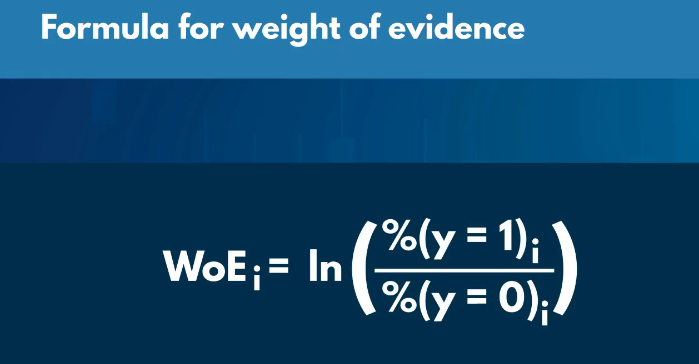

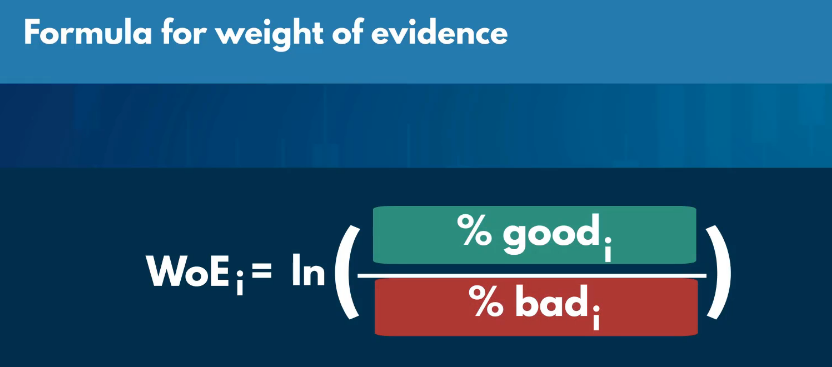

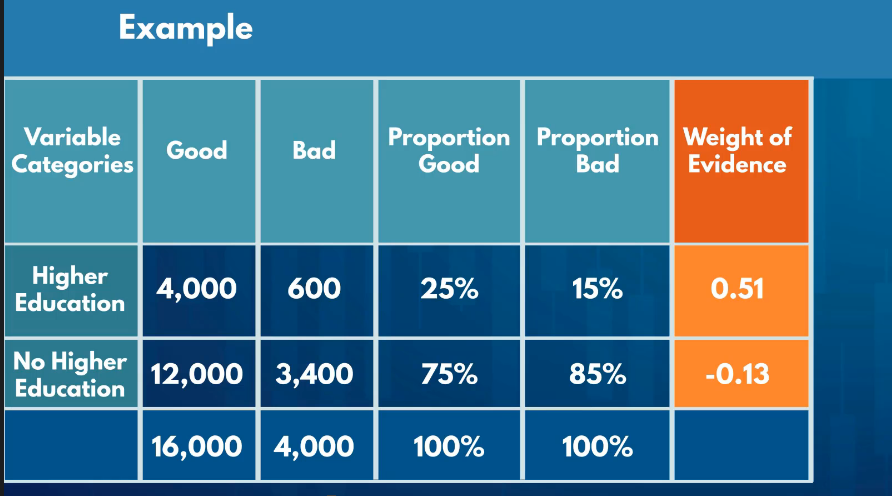

## Fine classing

Dividing the categories into regular intervals

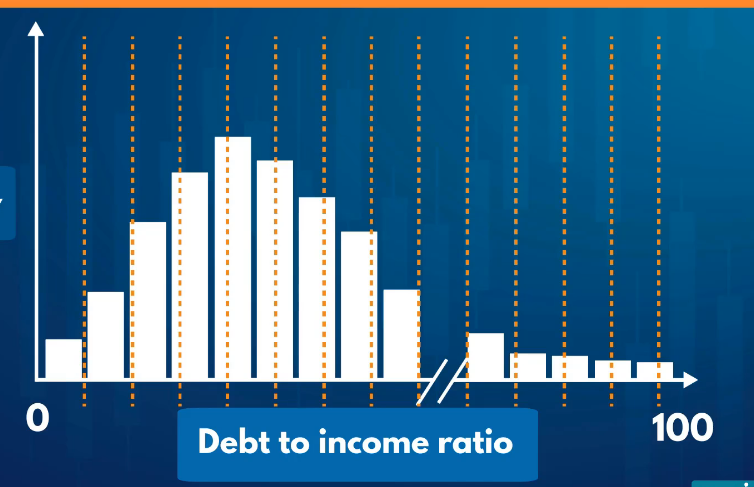

## coarse classing

Combing the intervals which have a similar weights after dividing into regular intervals

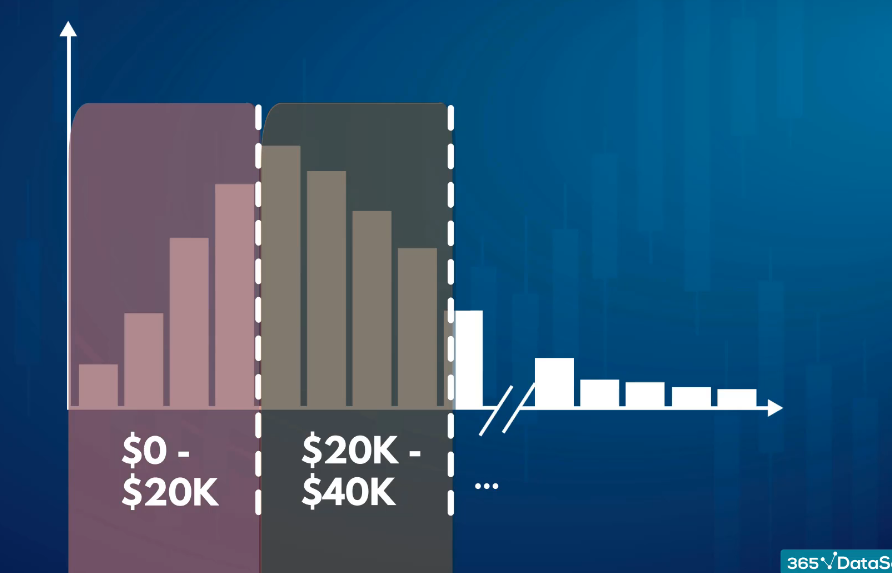

## Information value

Let's say the variable was divided into "k" categories. Then the weighted avereage of the weight of the evidence is called information value. It shows that how much information the original independent variable brings with respect to explaining the dependent variable.

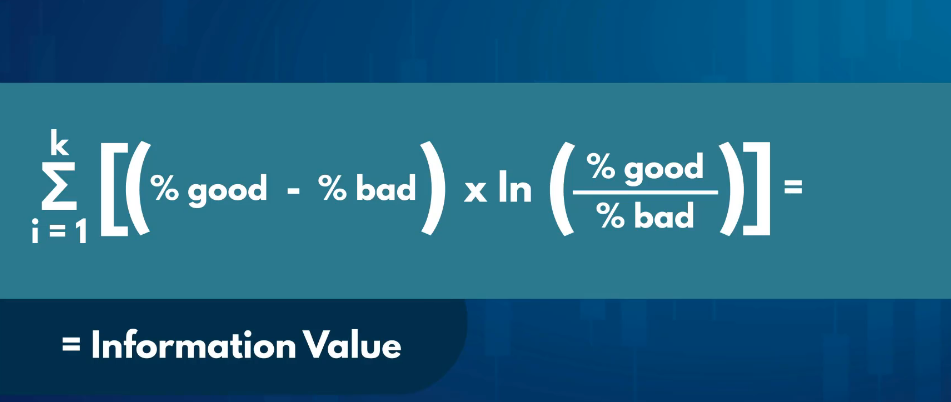

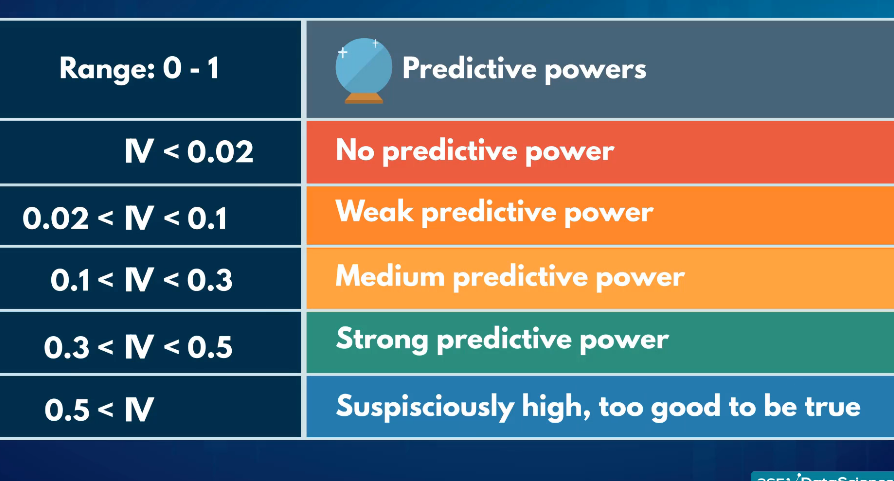

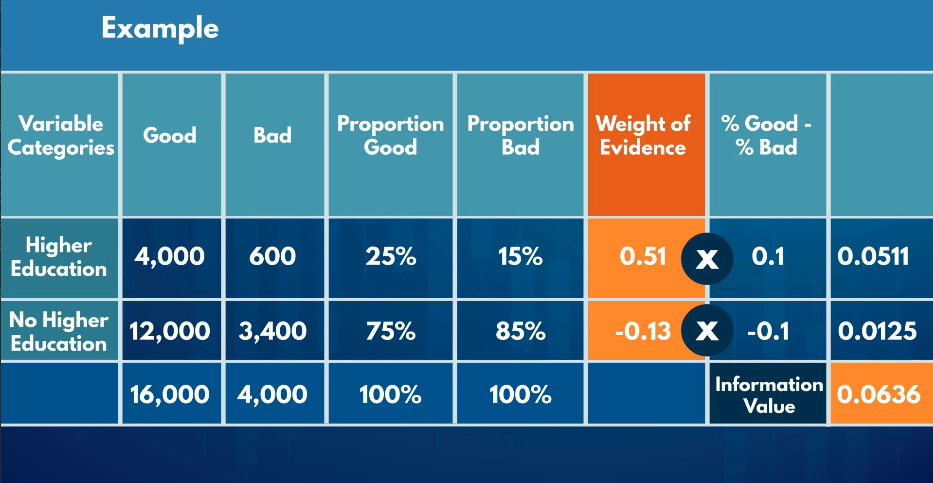

## Splitting Data

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
loan_data_inputs_train,loan_data_inputs_test,loan_data_targets_train,loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'],test_size=0.2,random_state=42)

In [62]:
loan_data_inputs_train.shape

(373028, 206)

In [63]:
loan_data_targets_train.shape

(373028,)

In [64]:
loan_data_inputs_test.shape

(93257, 206)

In [65]:
loan_data_targets_test.shape

(93257,)

# Data preparation

In [183]:
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr= loan_data_targets_test
pd.options.display.max_rows = 8

In [184]:
df_inputs_prepr["grade"].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [185]:
df1 = pd.concat([df_inputs_prepr["grade"],df_targets_prepr],axis=1)
df1

grade  good_bad
362514     C         1
288564     E         1
213591     C         1
263083     C         1
...      ...       ...
296284     B         1
61777      A         0
91763      A         1
167512     A         1

[93257 rows x 2 columns]

In [186]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

grade  good_bad
0     A     15108
1     B     27199
2     C     25048
3     D     15390
4     E      7145
5     F      2699
6     G       668

In [187]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

grade  good_bad
0     A      0.96
1     B      0.92
2     C      0.88
3     D      0.84
4     E      0.81
5     F      0.78
6     G      0.70

In [188]:
df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
           df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)
df1

grade  good_bad grade  good_bad
0     A     15108     A      0.96
1     B     27199     B      0.92
2     C     25048     C      0.88
3     D     15390     D      0.84
4     E      7145     E      0.81
5     F      2699     F      0.78
6     G       668     G      0.70

In [189]:
df1 =df1.iloc[ : ,[0,1,3]]
df1

grade  good_bad  good_bad
0     A     15108      0.96
1     B     27199      0.92
2     C     25048      0.88
3     D     15390      0.84
4     E      7145      0.81
5     F      2699      0.78
6     G       668      0.70

In [190]:
df1.columns = [df1.columns[0],'n_obs','prop_good']
df1

grade  n_obs  prop_good
0     A  15108       0.96
1     B  27199       0.92
2     C  25048       0.88
3     D  15390       0.84
4     E   7145       0.81
5     F   2699       0.78
6     G    668       0.70

In [191]:
df1["prop_n_obs"] = df1["n_obs"]/df1["n_obs"].sum()
df1

grade  n_obs  prop_good  prop_n_obs
0     A  15108       0.96        0.16
1     B  27199       0.92        0.29
2     C  25048       0.88        0.27
3     D  15390       0.84        0.17
4     E   7145       0.81        0.08
5     F   2699       0.78        0.03
6     G    668       0.70        0.01

In [192]:
df1["n_good"] = df1["prop_good"] * df1["n_obs"]
df1["n_bad"] = (1 - df1["prop_good"]) * df1["n_obs"]
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad
0     A  15108       0.96        0.16 14539.00  569.00
1     B  27199       0.92        0.29 25107.00 2092.00
2     C  25048       0.88        0.27 22115.00 2933.00
3     D  15390       0.84        0.17 12994.00 2396.00
4     E   7145       0.81        0.08  5753.00 1392.00
5     F   2699       0.78        0.03  2093.00  606.00
6     G    668       0.70        0.01   466.00  202.00

In [193]:
df1["prop_n_good"] = df1["n_good"]/df1["n_good"].sum()
df1["prop_n_bad"] = df1["n_bad"]/df1["n_bad"].sum()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108       0.96        0.16 14539.00  569.00         0.18   
1     B  27199       0.92        0.29 25107.00 2092.00         0.30   
2     C  25048       0.88        0.27 22115.00 2933.00         0.27   
3     D  15390       0.84        0.17 12994.00 2396.00         0.16   
4     E   7145       0.81        0.08  5753.00 1392.00         0.07   
5     F   2699       0.78        0.03  2093.00  606.00         0.03   
6     G    668       0.70        0.01   466.00  202.00         0.01   

   prop_n_bad  
0        0.06  
1        0.21  
2        0.29  
3        0.24  
4        0.14  
5        0.06  
6        0.02

In [194]:
df1["WoE"] = np.log(df1["prop_n_good"]/df1["prop_n_bad"])
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108       0.96        0.16 14539.00  569.00         0.18   
1     B  27199       0.92        0.29 25107.00 2092.00         0.30   
2     C  25048       0.88        0.27 22115.00 2933.00         0.27   
3     D  15390       0.84        0.17 12994.00 2396.00         0.16   
4     E   7145       0.81        0.08  5753.00 1392.00         0.07   
5     F   2699       0.78        0.03  2093.00  606.00         0.03   
6     G    668       0.70        0.01   466.00  202.00         0.01   

   prop_n_bad   WoE  
0        0.06  1.14  
1        0.21  0.39  
2        0.29 -0.08  
3        0.24 -0.41  
4        0.14 -0.68  
5        0.06 -0.86  
6        0.02 -1.26

In [195]:
df1 = df1.sort_values(["WoE"])
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
6     G    668       0.70        0.01   466.00  202.00         0.01   
5     F   2699       0.78        0.03  2093.00  606.00         0.03   
4     E   7145       0.81        0.08  5753.00 1392.00         0.07   
3     D  15390       0.84        0.17 12994.00 2396.00         0.16   
2     C  25048       0.88        0.27 22115.00 2933.00         0.27   
1     B  27199       0.92        0.29 25107.00 2092.00         0.30   
0     A  15108       0.96        0.16 14539.00  569.00         0.18   

   prop_n_bad   WoE  
6        0.02 -1.26  
5        0.06 -0.86  
4        0.14 -0.68  
3        0.24 -0.41  
2        0.29 -0.08  
1        0.21  0.39  
0        0.06  1.14

In [196]:
df1 = df1.reset_index(drop= True)
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668       0.70        0.01   466.00  202.00         0.01   
1     F   2699       0.78        0.03  2093.00  606.00         0.03   
2     E   7145       0.81        0.08  5753.00 1392.00         0.07   
3     D  15390       0.84        0.17 12994.00 2396.00         0.16   
4     C  25048       0.88        0.27 22115.00 2933.00         0.27   
5     B  27199       0.92        0.29 25107.00 2092.00         0.30   
6     A  15108       0.96        0.16 14539.00  569.00         0.18   

   prop_n_bad   WoE  
0        0.02 -1.26  
1        0.06 -0.86  
2        0.14 -0.68  
3        0.24 -0.41  
4        0.29 -0.08  
5        0.21  0.39  
6        0.06  1.14

In [197]:
df1["diff_prop_good"] = df1["prop_good"].diff().abs()
df1["diff_WoE"] = df1["WoE"].diff().abs()
df1 #abs() gives the absolute value

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668       0.70        0.01   466.00  202.00         0.01   
1     F   2699       0.78        0.03  2093.00  606.00         0.03   
2     E   7145       0.81        0.08  5753.00 1392.00         0.07   
3     D  15390       0.84        0.17 12994.00 2396.00         0.16   
4     C  25048       0.88        0.27 22115.00 2933.00         0.27   
5     B  27199       0.92        0.29 25107.00 2092.00         0.30   
6     A  15108       0.96        0.16 14539.00  569.00         0.18   

   prop_n_bad   WoE  diff_prop_good  diff_WoE  
0        0.02 -1.26             NaN       NaN  
1        0.06 -0.86            0.08      0.40  
2        0.14 -0.68            0.03      0.18  
3        0.24 -0.41            0.04      0.27  
4        0.29 -0.08            0.04      0.33  
5        0.21  0.39            0.04      0.46  
6        0.06  1.14            0.04      0.76

In [198]:
df1["IV"] = (df1["prop_n_good"]-df1["prop_n_bad"])*df1["WoE"]
df1["IV"] = df1["IV"].sum()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668       0.70        0.01   466.00  202.00         0.01   
1     F   2699       0.78        0.03  2093.00  606.00         0.03   
2     E   7145       0.81        0.08  5753.00 1392.00         0.07   
3     D  15390       0.84        0.17 12994.00 2396.00         0.16   
4     C  25048       0.88        0.27 22115.00 2933.00         0.27   
5     B  27199       0.92        0.29 25107.00 2092.00         0.30   
6     A  15108       0.96        0.16 14539.00  569.00         0.18   

   prop_n_bad   WoE  diff_prop_good  diff_WoE   IV  
0        0.02 -1.26             NaN       NaN 0.30  
1        0.06 -0.86            0.08      0.40 0.30  
2        0.14 -0.68            0.03      0.18 0.30  
3        0.24 -0.41            0.04      0.27 0.30  
4        0.29 -0.08            0.04      0.33 0.30  
5        0.21  0.39            0.04      0.46 0.30  
6        0.06  1.14            0.04      0.76 0.30

## preprocessing discrete variables: Automating calculations

In [199]:
def woe_discrete(df, discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
           df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [200]:
df_temp = woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)
df_temp

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668       0.70        0.01   466.00  202.00         0.01   
1     F   2699       0.78        0.03  2093.00  606.00         0.03   
2     E   7145       0.81        0.08  5753.00 1392.00         0.07   
3     D  15390       0.84        0.17 12994.00 2396.00         0.16   
4     C  25048       0.88        0.27 22115.00 2933.00         0.27   
5     B  27199       0.92        0.29 25107.00 2092.00         0.30   
6     A  15108       0.96        0.16 14539.00  569.00         0.18   

   prop_n_bad   WoE  diff_prop_good  diff_WoE   IV  
0        0.02 -1.26             NaN       NaN 0.30  
1        0.06 -0.86            0.08      0.40 0.30  
2        0.14 -0.68            0.03      0.18 0.30  
3        0.24 -0.41            0.04      0.27 0.30  
4        0.29 -0.08            0.04      0.33 0.30  
5        0.21  0.39            0.04      0.46 0.30  
6        0.06  1.14            0.04      0.76 0.30

## visualising results

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #more like skin on pyplot

In [202]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: ,0].apply(str))#matplotlib doesnt fare well with dfs and strings. So we turned it into array
    y = df_WoE["WoE"]
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker = "o",linestyle = "--", color ="k")
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel("Weight of Evidence")
    plt.title(str("Weight of Evidence by " + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)    

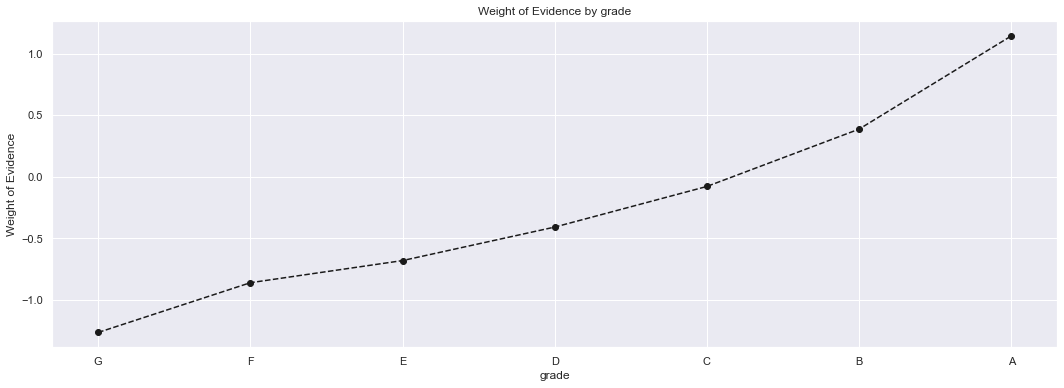

In [203]:
plot_by_woe(df_temp)

## Preprocessing Discrete varibles : Creating dummy variables

#### 1. home ownership

In [204]:
df_temp = woe_discrete(df_inputs_prepr, "home_ownership",df_targets_prepr)
df_temp

home_ownership  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          OTHER     45       0.78        0.00    35.00   10.00         0.00   
1           NONE     10       0.80        0.00     8.00    2.00         0.00   
2           RENT  37874       0.87        0.41 33102.00 4772.00         0.40   
3            OWN   8409       0.89        0.09  7472.00  937.00         0.09   
4       MORTGAGE  46919       0.90        0.50 42450.00 4469.00         0.51   

   prop_n_bad   WoE  diff_prop_good  diff_WoE   IV  
0        0.00 -0.85             NaN       NaN 0.02  
1        0.00 -0.71            0.02      0.13 0.02  
2        0.47 -0.16            0.07      0.55 0.02  
3        0.09 -0.02            0.01      0.14 0.02  
4        0.44  0.15            0.02      0.17 0.02

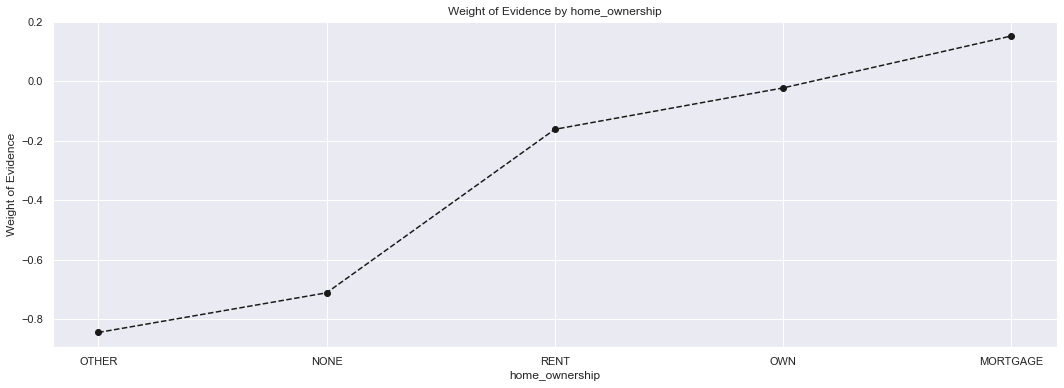

In [205]:
plot_by_woe(df_temp)

Clearly, other and none category has higher evidence of default. But the number of observations of each category(also Any) is less. So we can avoid these variables

So, we shall combine the those three variables with Rent(base dummy)

In [206]:
df_inputs_prepr["home_ownership:RENT_OTHER_NONE_ANY"] = sum ([df_inputs_prepr["home_ownership:RENT"],df_inputs_prepr["home_ownership:OTHER"],
                                                             df_inputs_prepr["home_ownership:NONE"],df_inputs_prepr["home_ownership:ANY"]])

#### 2. addr_state

In [207]:
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [208]:
df_temp = woe_discrete(df_inputs_prepr,"addr_state",df_targets_prepr)
pd.options.display.max_rows = None
df_temp

C:\Users\sathi\anaconda3\envs\r4-anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE      1       0.00        0.00     0.00    1.00         0.00   
1          ID      2       0.50        0.00     1.00    1.00         0.00   
2          NV   1298       0.86        0.01  1111.00  187.00         0.01   
3          HI    486       0.86        0.01   418.00   68.00         0.01   
4          FL   6426       0.87        0.07  5591.00  835.00         0.07   
5          AL   1182       0.87        0.01  1032.00  150.00         0.01   
6          NJ   3676       0.88        0.04  3218.00  458.00         0.04   
7          LA   1130       0.88        0.01   990.00  140.00         0.01   
8          NY   8031       0.88        0.09  7067.00  964.00         0.09   
9          RI    403       0.88        0.00   355.00   48.00         0.00   
10         NC   2478       0.88        0.03  2185.00  293.00         0.03   
11         MI   2358       0.88        0.03  2080.00  278.00         0.03   
12         DE    208       0.88        0.00   184.00   24.00         0.00   
13         MD   2203       0.88        0.02  1949.00  254.00         0.02   
14         OK    833       0.89        0.01   738.00   95.00         0.01   
15         MO   1491       0.89        0.02  1321.00  170.00         0.02   
16         AR    728       0.89        0.01   646.00   82.00         0.01   
17         PA   3334       0.89        0.04  2961.00  373.00         0.04   
18         SD    179       0.89        0.00   159.00   20.00         0.00   
19         AZ   2067       0.89        0.02  1837.00  230.00         0.02   
20         NM    513       0.89        0.01   456.00   57.00         0.01   
21         CA  14251       0.89        0.15 12675.00 1576.00         0.15   
22         MA   2214       0.89        0.02  1979.00  235.00         0.02   
23         GA   3015       0.89        0.03  2695.00  320.00         0.03   
24         IN   1315       0.89        0.01  1176.00  139.00         0.01   
25         VA   2856       0.89        0.03  2556.00  300.00         0.03   
26         NH    402       0.90        0.00   360.00   42.00         0.00   
27         OH   3102       0.90        0.03  2778.00  324.00         0.03   
28         UT    672       0.90        0.01   602.00   70.00         0.01   
29         WI   1171       0.90        0.01  1050.00  121.00         0.01   
30         MN   1632       0.90        0.02  1464.00  168.00         0.02   
31         WA   2145       0.90        0.02  1930.00  215.00         0.02   
32         CO   1916       0.91        0.02  1736.00  180.00         0.02   
33         TX   7281       0.91        0.08  6597.00  684.00         0.08   
34         SC   1135       0.91        0.01  1029.00  106.00         0.01   
35         TN   1139       0.91        0.01  1033.00  106.00         0.01   
36         OR   1135       0.91        0.01  1030.00  105.00         0.01   
37         IL   3779       0.91        0.04  3434.00  345.00         0.04   
38         KY    851       0.91        0.01   774.00   77.00         0.01   
39         CT   1429       0.91        0.02  1300.00  129.00         0.02   
40         WV    486       0.92        0.01   446.00   40.00         0.01   
41         WY    209       0.92        0.00   192.00   17.00         0.00   
42         AK    248       0.92        0.00   228.00   20.00         0.00   
43         KS    830       0.92        0.01   764.00   66.00         0.01   
44         VT    178       0.92        0.00   164.00   14.00         0.00   
45         DC    297       0.92        0.00   274.00   23.00         0.00   
46         MS    246       0.92        0.00   227.00   19.00         0.00   
47         MT    293       0.93        0.00   272.00   21.00         0.00   
48         ME      2       1.00        0.00     2.00    0.00         0.00   
49         IA      1       1.00        0.00     1.00    0.00         0.00   

    prop_n_bad   WoE  diff_prop_good  diff_WoE  IV  
0         0.00  -inf  

Note there are only 50 rows in the above rows, instead of 51. It is because state of ND has 0 values. There is two infinity values for ME and ID. It is because n_bad is almost 0

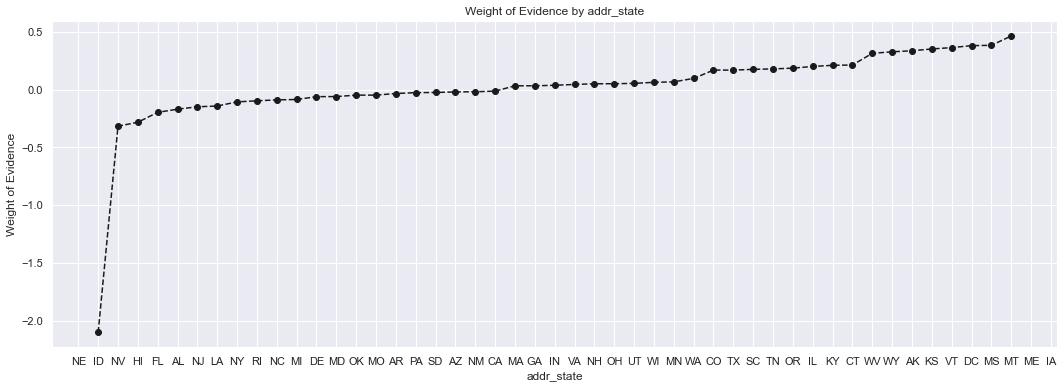

In [209]:
plot_by_woe(df_temp)

In [210]:
if ["addr_state:ND"] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr["addr_state:ND"] = 0

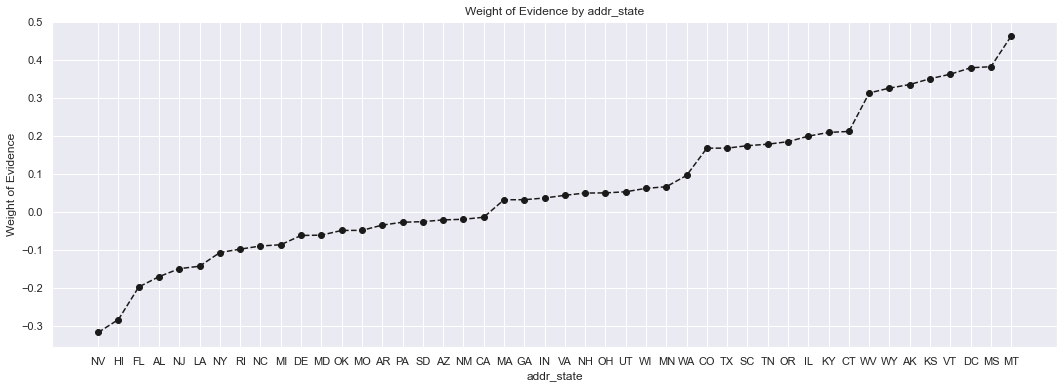

In [211]:
plot_by_woe(df_temp.iloc[2: -2, : ])

Note: We put the categories with lowest number of observations in high risk 

###### Combining categories 

1. From the graph, NV is on different weight, while the next three are on same weight. So we can different dummy for first one and next three together.But, NV has only 0.01% of total values(also NE and IA has very low number of observations), so we can ideally combine them with the following three.
2. Also, WV,NH, WY, DC are on different weights to create different dummy.But it has very low number of observations(also ME and ID have low number of observations), so we will join it together

In [212]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])
                                                          
df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

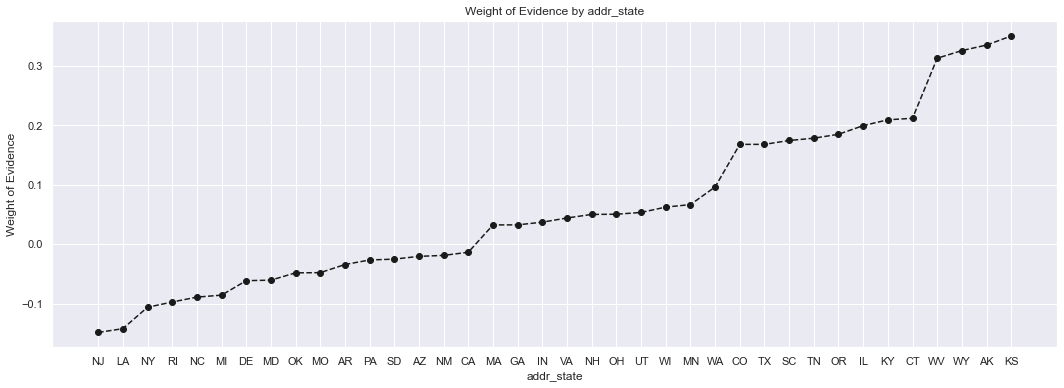

In [213]:
plot_by_woe(df_temp.iloc[6: -6, :])

1. Categories NM to CA are in similar weights to put it in the same dummy. But the number of observations of NY and CA are sufficient enough to put in the seperate dummy. So, We will combine a dummy for NM +VA, NY, OK+TN+MO+LA+MD+NC and CA.
(we didnt add NM+ VA+OK+TN+MO+LA+MD+NC together because both are seperated by NY which has more than 10%of the data.)
2. We will combine UT+KY+AZ+NJ, AR+MI+PA+OH+MN , RI+MA+DE+SD+IN , GA+WA+OR into same dummmy as they have similar weights and none of them have significantly higher number of observations to put it in seperate dummy.
3.  WI and MT have low number of observations, so we will combine them together.
4.  TX has higher number of observations to be in seperate dummy
5. IL and CT have same level of weight and not sigificantly higher number of observations. So we will combine it.
6. Even though KS to MS has different level of weights, it doesnt have not sigificantly higher number of observations. So we will combine it.

In [214]:
df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

In [215]:
df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])
df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])
df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

In [216]:
df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

In [217]:
df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

In [218]:
df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

#### 3. verification_status

In [219]:
df_temp = woe_discrete(df_inputs_prepr,"verification_status",df_targets_prepr)
df_temp

verification_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            Verified  33641       0.87        0.36 29336.00 4305.00   
1     Source Verified  29963       0.90        0.32 26839.00 3124.00   
2        Not Verified  29653       0.91        0.32 26892.00 2761.00   

   prop_n_good  prop_n_bad   WoE  diff_prop_good  diff_WoE   IV  
0         0.35        0.42 -0.18             NaN       NaN 0.02  
1         0.32        0.31  0.05            0.02      0.23 0.02  
2         0.32        0.27  0.18            0.01      0.13 0.02

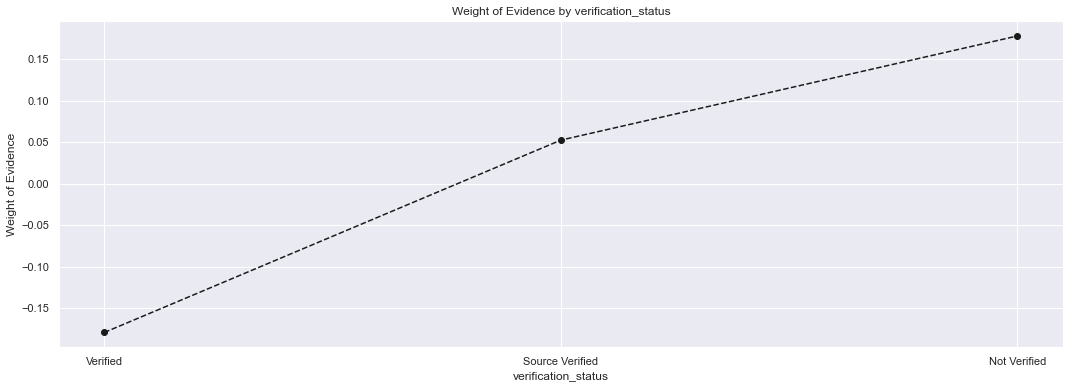

In [220]:
plot_by_woe(df_temp)

#### 4. purpose

In [221]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr,)
df_temp

purpose  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0          educational     89       0.75        0.00    67.00   22.00   
1     renewable_energy     70       0.77        0.00    54.00   16.00   
2       small_business   1431       0.78        0.02  1112.00  319.00   
3              medical    918       0.86        0.01   787.00  131.00   
4                house    439       0.86        0.00   377.00   62.00   
5                other   4806       0.86        0.05  4138.00  668.00   
6              wedding    456       0.86        0.00   394.00   62.00   
7               moving    602       0.88        0.01   529.00   73.00   
8             vacation    496       0.88        0.01   437.00   59.00   
9   debt_consolidation  55012       0.89        0.59 48736.00 6276.00   
10      major_purchase   1991       0.90        0.02  1793.00  198.00   
11    home_improvement   5299       0.91        0.06  4803.00  496.00   
12                 car   1072       0.92        0.01   982.00   90.00   
13         credit_card  20576       0.92        0.22 18858.00 1718.00   

    prop_n_good  prop_n_bad   WoE  diff_prop_good  diff_WoE   IV  
0          0.00        0.00 -0.98             NaN       NaN 0.05  
1          0.00        0.00 -0.88            0.02      0.10 0.05  
2          0.01        0.03 -0.85            0.01      0.03 0.05  
3          0.01        0.01 -0.31            0.08      0.54 0.05  
4          0.00        0.01 -0.29            0.00      0.01 0.05  
5          0.05        0.07 -0.27            0.00      0.02 0.05  
6          0.00        0.01 -0.25            0.00      0.03 0.05  
7          0.01        0.01 -0.12            0.01      0.13 0.05  
8          0.01        0.01 -0.10            0.00      0.02 0.05  
9          0.59        0.62 -0.05            0.00      0.05 0.05  
10         0.02        0.02  0.11            0.01      0.15 0.05  
11         0.06        0.05  0.17            0.01      0.07 0.05  
12         0.01        0.01  0.29            0.01      0.12 0.05  
13         0.23        0.17  0.30            0.00      0.01 0.05

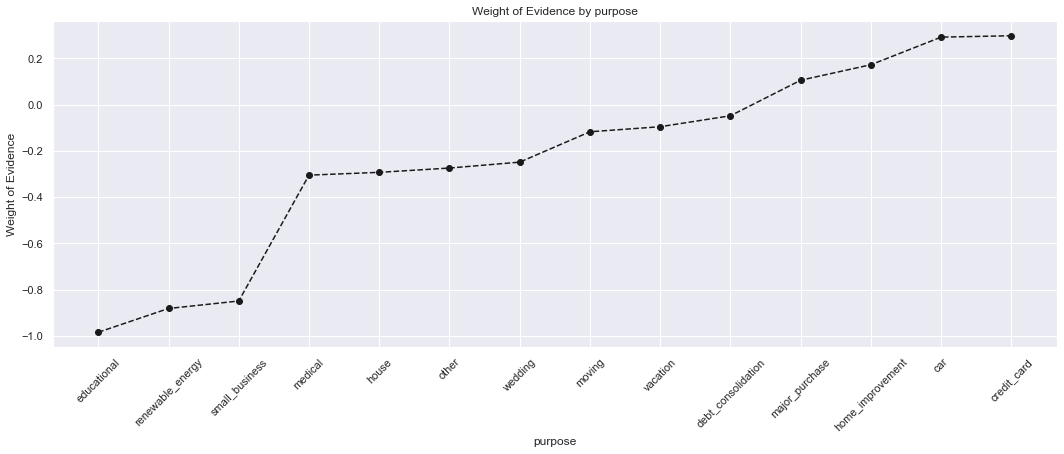

In [222]:
plot_by_woe(df_temp,  rotation_of_x_axis_labels = 45)

##### 1. credit card ,debt consolidation and housing has higher number of data to be in seperate dummy
##### 2. small_business to vacation has low number of values. So we will add them together
##### 3. home to car has also low number of values. So we will add them together

In [223]:
df_inputs_prepr['purpose:sm_bus_edu_mov_hou'] = sum([df_inputs_prepr['purpose:small_business'],df_inputs_prepr['purpose:educational'], 
                                                                         df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])

df_inputs_prepr['purpose:RE_med_wed_vac'] =sum([df_inputs_prepr['purpose:renewable_energy'],df_inputs_prepr['purpose:medical'],
                                                df_inputs_prepr['purpose:wedding'],df_inputs_prepr['purpose:vacation']])

df_inputs_prepr['purpose:home_imp__maj_pur_car'] = sum([df_inputs_prepr['purpose:home_improvement'],df_inputs_prepr['purpose:major_purchase'],
                                                             df_inputs_prepr['purpose:car']])

#### 5. initial_list_status

In [224]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0                   f  60491       0.88        0.65 53213.00 7278.00   
1                   w  32766       0.91        0.35 29854.00 2912.00   

   prop_n_good  prop_n_bad   WoE  diff_prop_good  diff_WoE   IV  
0         0.64        0.71 -0.11             NaN       NaN 0.02  
1         0.36        0.29  0.23            0.03      0.34 0.02

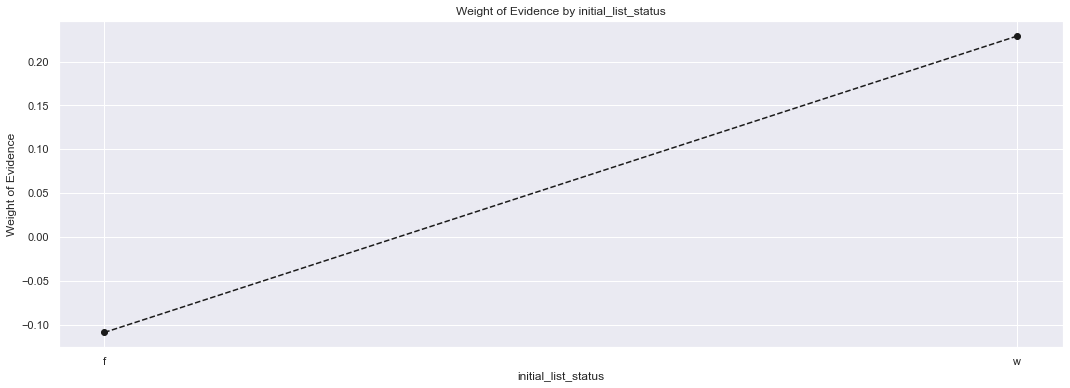

In [225]:
plot_by_woe(df_temp)

In [226]:
pd.options.display.max_rows = None

## preprocessing the continuous variables : Automating calculations

In [227]:
def woe_ordered_continuous(df, discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
           df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Preprcoessing continuous variables : creating dummy variables, part 1

#### 1. term_int

In [228]:
df_inputs_prepr["term_int"].unique()

array([60, 36], dtype=int64)

In [229]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"term_int", df_targets_prepr)
df_temp

term_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        36  67534       0.90        0.72 60956.00 6578.00         0.73   
1        60  25723       0.86        0.28 22111.00 3612.00         0.27   

   prop_n_bad   WoE  diff_prop_good  diff_WoE   IV  
0        0.65  0.13             NaN       NaN 0.04  
1        0.35 -0.29            0.04      0.41 0.04

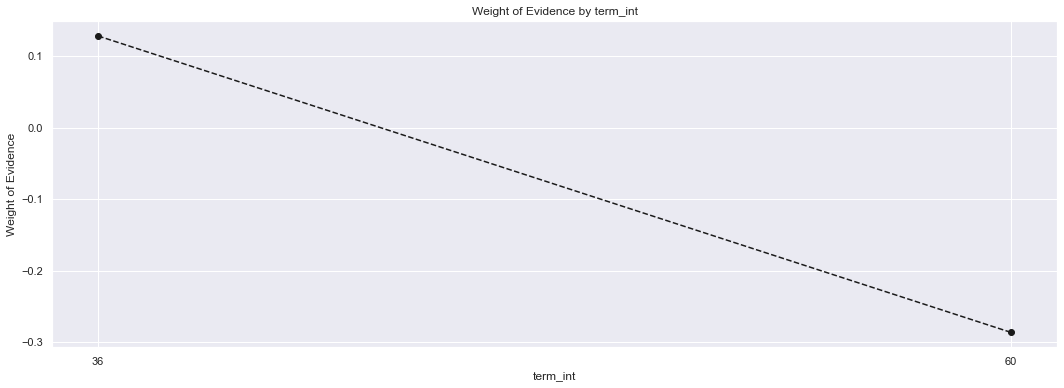

In [230]:
plot_by_woe(df_temp)

In [231]:
df_inputs_prepr["term:36"] = np.where(df_inputs_prepr["term_int"]==36,1,0)
df_inputs_prepr["term:60"] = np.where(df_inputs_prepr["term_int"]==60,1,0)

#### 2. emp_length_int

In [232]:
df_inputs_prepr["emp_length_int"].unique()

array([ 0., 10.,  1.,  2.,  9.,  3.,  6.,  4.,  7.,  8.,  5.])

In [233]:
len(df_inputs_prepr["emp_length_int"].unique())

11

In [234]:
df_temp =woe_ordered_continuous(df_inputs_prepr,"emp_length_int",df_targets_prepr)
df_temp

emp_length_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0             0.00  11553       0.87        0.12 10103.00 1450.00   
1             1.00   5968       0.89        0.06  5327.00  641.00   
2             2.00   8295       0.89        0.09  7361.00  934.00   
3             3.00   7391       0.89        0.08  6573.00  818.00   
4             4.00   5555       0.89        0.06  4941.00  614.00   
5             5.00   6172       0.89        0.07  5470.00  702.00   
6             6.00   5225       0.88        0.06  4592.00  633.00   
7             7.00   5131       0.89        0.06  4585.00  546.00   
8             8.00   4542       0.89        0.05  4043.00  499.00   
9             9.00   3621       0.89        0.04  3233.00  388.00   
10           10.00  29804       0.90        0.32 26839.00 2965.00   

    prop_n_good  prop_n_bad   WoE  diff_prop_good  diff_WoE   IV  
0          0.12        0.14 -0.16             NaN       NaN 0.01  
1          0.06        0.06  0.02            0.02      0.18 0.01  
2          0.09        0.09 -0.03            0.01      0.05 0.01  
3          0.08        0.08 -0.01            0.00      0.02 0.01  
4          0.06        0.06 -0.01            0.00      0.00 0.01  
5          0.07        0.07 -0.05            0.00      0.03 0.01  
6          0.06        0.06 -0.12            0.01      0.07 0.01  
7          0.06        0.05  0.03            0.01      0.15 0.01  
8          0.05        0.05 -0.01            0.00      0.04 0.01  
9          0.04        0.04  0.02            0.00      0.03 0.01  
10         0.32        0.29  0.10            0.01      0.08 0.01

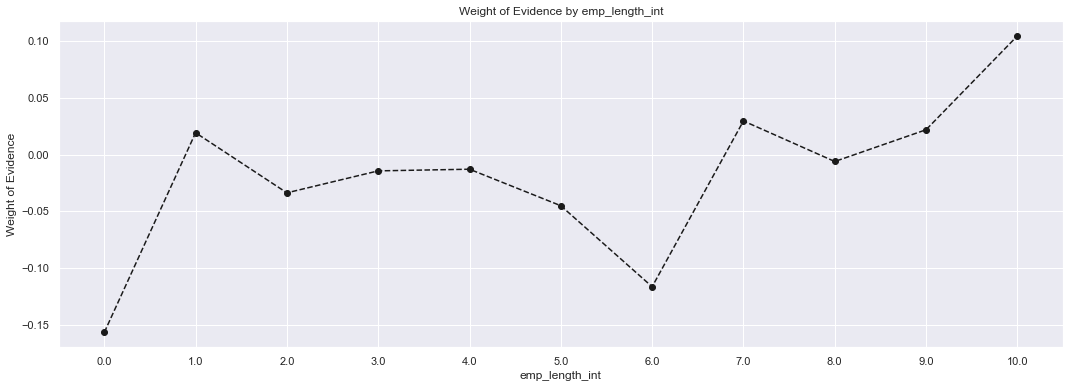

In [235]:
plot_by_woe(df_temp)

In [236]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr["emp_length_int"].isin([0]),1,0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr["emp_length_int"].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr["emp_length_int"].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr["emp_length_int"].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr["emp_length_int"].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr["emp_length_int"].isin([10]),1,0)

#### 3. mth since issue

In [237]:
df_inputs_prepr["mths_since_issue_d"].unique()

array([ 98.,  95., 123.,  94., 115., 107., 143., 108., 105., 116., 129.,
       134., 104., 103., 113., 112., 176., 120., 159.,  96., 110.,  97.,
       109., 100., 106., 114., 102.,  93., 111., 131., 101., 130., 160.,
       127., 152., 146., 125., 139., 128., 133., 161., 122., 137., 148.,
       132., 124.,  99., 118., 121., 117., 142., 145., 167., 153., 135.,
       140., 126., 147., 119., 165., 136., 149., 175., 156., 138., 172.,
       154., 171., 173., 157., 150., 174., 163., 181., 158., 182., 144.,
       141., 151., 162., 166., 155., 164., 169., 170., 179., 168., 177.,
       178., 180., 183.])

In [238]:
len(df_inputs_prepr["mths_since_issue_d"].unique())

91

### Fine classing the variable

In [239]:
df_inputs_prepr["mths_since_issue_d_factor"] = pd.cut(df_inputs_prepr["mths_since_issue_d"],50)

In [240]:
df_inputs_prepr["mths_since_issue_d_factor"].head()

362514      (96.6, 98.4]
288564      (94.8, 96.6]
213591    (121.8, 123.6]
263083     (92.91, 94.8]
165001    (114.6, 116.4]
Name: mths_since_issue_d_factor, dtype: category
Categories (50, interval[float64, right]): [(92.91, 94.8] < (94.8, 96.6] < (96.6, 98.4] < (98.4, 100.2] ... (175.8, 177.6] < (177.6, 179.4] < (179.4, 181.2] < (181.2, 183.0]]

In [241]:
df_temp = woe_ordered_continuous(df_inputs_prepr,"mths_since_issue_d_factor", df_targets_prepr)
df_temp

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0              (92.91, 94.8]   7191       0.95        0.08 6801.00 390.00   
1               (94.8, 96.6]   9752       0.93        0.10 9073.00 679.00   
2               (96.6, 98.4]   9506       0.92        0.10 8745.00 761.00   
3              (98.4, 100.2]   7240       0.91        0.08 6582.00 658.00   
4             (100.2, 102.0]   7217       0.90        0.08 6516.00 701.00   
5             (102.0, 103.8]   3104       0.90        0.03 2779.00 325.00   
6             (103.8, 105.6]   6197       0.89        0.07 5517.00 680.00   
7             (105.6, 107.4]   5821       0.89        0.06 5157.00 664.00   
8             (107.4, 109.2]   5021       0.88        0.05 4413.00 608.00   
9             (109.2, 111.0]   4497       0.87        0.05 3931.00 566.00   
10            (111.0, 112.8]   2064       0.87        0.02 1788.00 276.00   
11            (112.8, 114.6]   3572       0.86        0.04 3077.00 495.00   
12            (114.6, 116.4]   2904       0.85        0.03 2471.00 433.00   
13            (116.4, 118.2]   2474       0.85        0.03 2097.00 377.00   
14            (118.2, 120.0]   2539       0.85        0.03 2163.00 376.00   
15            (120.0, 121.8]   1115       0.84        0.01  934.00 181.00   
16            (121.8, 123.6]   1721       0.82        0.02 1406.00 315.00   
17            (123.6, 125.4]   1296       0.85        0.01 1105.00 191.00   
18            (125.4, 127.2]   1097       0.84        0.01  921.00 176.00   
19            (127.2, 129.0]   1001       0.82        0.01  817.00 184.00   
20            (129.0, 130.8]    447       0.83        0.00  371.00  76.00   
21            (130.8, 132.6]    790       0.85        0.01  674.00 116.00   
22            (132.6, 134.4]    754       0.87        0.01  654.00 100.00   
23            (134.4, 136.2]    690       0.84        0.01  583.00 107.00   
24            (136.2, 138.0]    599       0.88        0.01  525.00  74.00   
25            (138.0, 139.8]    254       0.87        0.00  221.00  33.00   
26            (139.8, 141.6]    533       0.88        0.01  468.00  65.00   
27            (141.6, 143.4]    459       0.84        0.00  384.00  75.00   
28            (143.4, 145.2]    443       0.86        0.00  383.00  60.00   
29            (145.2, 147.0]    439       0.86        0.00  379.00  60.00   
30            (147.0, 148.8]    194       0.84        0.00  162.00  32.00   
31            (148.8, 150.6]    367       0.90        0.00  329.00  38.00   
32            (150.6, 152.4]    257       0.88        0.00  226.00  31.00   
33            (152.4, 154.2]    276       0.84        0.00  231.00  45.00   
34            (154.2, 156.0]    234       0.83        0.00  194.00  40.00   
35            (156.0, 157.8]    100       0.92        0.00   92.00   8.00   
36            (157.8, 159.6]    170       0.84        0.00  142.00  28.00   
37            (159.6, 161.4]    150       0.87        0.00  131.00  19.00   
38            (161.4, 163.2]    129       0.87        0.00  112.00  17.00   
39            (163.2, 165.0]    119       0.82        0.00   97.00  22.00   
40            (165.0, 166.8]     36       0.86        0.00   31.00   5.00   
41            (166.8, 168.6]     40       0.80        0.00   32.00   8.00   
42            (168.6, 170.4]     37       0.97        0.00   36.00   1.00   
43            (170.4, 172.2]     57       0.82        0.00   47.00  10.00   
44            (172.2, 174.0]    131       0.80        0.00  105.00  26.00   
45            (174.0, 175.8]     59       0.81        0.00   48.00  11.00   
46            (175.8, 177.6]     83       0.73        0.00   61.00  22.00   
47            (177.6, 179.4]     41       0.61        0.00   25.00  16.00   
48            (179.4, 181.2]     23       0.70        0.00   16.00   7.00   
49            (181.2, 183.0]     17       0.88        0.00   15.00   2.00   

    prop_n_good  prop_n_bad   WoE  diff_prop_good  diff_WoE   IV  
0       

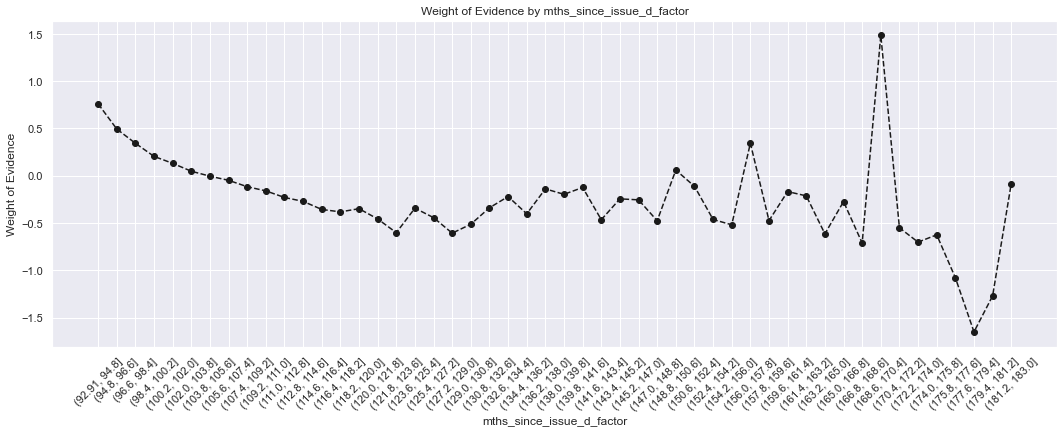

In [242]:
plot_by_woe(df_temp, 45)

### coarse classing of the same variable

First three have different weights. So we will have seperate dummy.

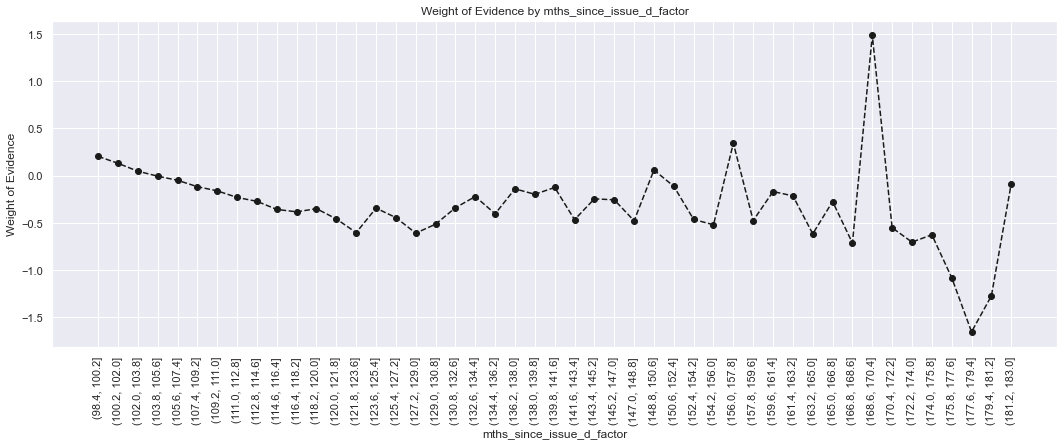

In [243]:
plot_by_woe(df_temp.iloc[3: , ], 90)

1. First four have same weights. So we will combine it
2. Next two have similar weights as well
3. Next 7 has similar weights to be in a single category
4. Remaining categories have different weights but have low number of observations. So we can either take whole in single category or in splitting the category into two.


As, months are in integers, we will use integer for intervals

In [244]:
df_inputs_prepr['mths_since_issue_d:<95'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(95)), 1, 0)
df_inputs_prepr['mths_since_issue_d:95-96'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(95, 97)), 1, 0)
df_inputs_prepr['mths_since_issue_d:97-98'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(97, 99)), 1, 0)
df_inputs_prepr['mths_since_issue_d:99-105'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(99, 106)), 1, 0)
df_inputs_prepr['mths_since_issue_d:106-109'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(106, 110)), 1, 0)
df_inputs_prepr['mths_since_issue_d:110-121'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(110, 122)), 1, 0)
df_inputs_prepr['mths_since_issue_d:122-141'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(122, 142)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>141'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(142,int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

#### 4. int rate 

In [245]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [246]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (5.399, 5.833]    198       0.97        0.00  192.00   6.00   
1     (5.833, 6.246]   2086       0.98        0.02 2044.00  42.00   
2     (6.246, 6.658]   1974       0.97        0.02 1919.00  55.00   
3     (6.658, 7.071]    477       0.95        0.01  454.00  23.00   
4     (7.071, 7.484]    804       0.98        0.01  789.00  15.00   
5     (7.484, 7.897]   3245       0.97        0.03 3133.00 112.00   
6      (7.897, 8.31]   2429       0.95        0.03 2310.00 119.00   
7      (8.31, 8.722]   1680       0.97        0.02 1622.00  58.00   
8     (8.722, 9.135]   2384       0.94        0.03 2246.00 138.00   
9     (9.135, 9.548]   1590       0.98        0.02 1553.00  37.00   
10    (9.548, 9.961]   1881       0.93        0.02 1752.00 129.00   
11   (9.961, 10.374]   2766       0.94        0.03 2590.00 176.00   
12  (10.374, 10.786]   1390       0.92        0.01 1276.00 114.00   
13  (10.786, 11.199]   4464       0.94        0.05 4185.00 279.00   
14  (11.199, 11.612]   1213       0.92        0.01 1112.00 101.00   
15  (11.612, 12.025]   3737       0.93        0.04 3481.00 256.00   
16  (12.025, 12.438]   3077       0.91        0.03 2787.00 290.00   
17   (12.438, 12.85]   2754       0.92        0.03 2534.00 220.00   
18   (12.85, 13.263]   5440       0.90        0.06 4918.00 522.00   
19  (13.263, 13.676]   3806       0.90        0.04 3417.00 389.00   
20  (13.676, 14.089]   2692       0.89        0.03 2409.00 283.00   
21  (14.089, 14.502]   5760       0.89        0.06 5110.00 650.00   
22  (14.502, 14.914]   1187       0.87        0.01 1030.00 157.00   
23  (14.914, 15.327]   4811       0.88        0.05 4244.00 567.00   
24   (15.327, 15.74]   3146       0.89        0.03 2790.00 356.00   
25   (15.74, 16.153]   1869       0.84        0.02 1565.00 304.00   
26  (16.153, 16.566]   3230       0.85        0.03 2743.00 487.00   
27  (16.566, 16.978]   1035       0.85        0.01  882.00 153.00   
28  (16.978, 17.391]   2843       0.85        0.03 2411.00 432.00   
29  (17.391, 17.804]   2992       0.84        0.03 2506.00 486.00   
30  (17.804, 18.217]    286       0.84        0.00  239.00  47.00   
31   (18.217, 18.63]   2729       0.83        0.03 2258.00 471.00   
32   (18.63, 19.042]   1835       0.82        0.02 1505.00 330.00   
33  (19.042, 19.455]   1135       0.79        0.01  893.00 242.00   
34  (19.455, 19.868]   1680       0.82        0.02 1372.00 308.00   
35  (19.868, 20.281]   1244       0.85        0.01 1057.00 187.00   
36  (20.281, 20.694]    805       0.81        0.01  656.00 149.00   
37  (20.694, 21.106]    956       0.79        0.01  757.00 199.00   
38  (21.106, 21.519]    701       0.76        0.01  531.00 170.00   
39  (21.519, 21.932]    222       0.80        0.00  178.00  44.00   
40  (21.932, 22.345]    832       0.78        0.01  645.00 187.00   
41  (22.345, 22.758]    586       0.74        0.01  432.00 154.00   
42   (22.758, 23.17]    375       0.74        0.00  278.00  97.00   
43   (23.17, 23.583]    655       0.78        0.01  510.00 145.00   
44  (23.583, 23.996]    408       0.75        0.00  306.00 102.00   
45  (23.996, 24.409]    393       0.83        0.00  328.00  65.00   
46  (24.409, 24.822]    436       0.79        0.00  343.00  93.00   
47  (24.822, 25.234]    351       0.79        0.00  278.00  73.00   
48  (25.234, 25.647]    194       0.76        0.00  147.00  47.00   
49   (25.647, 26.06]    474       0.74        0.01  350.00 124.00   

    prop_n_good  prop_n_bad   WoE  diff_prop_good  diff_WoE   IV  
0          0.00        0.00  1.37             NaN       NaN 0.37  
1          0.02        0.00  1.79            0.01      0.42 0.37  
2          0.02        0.01  1.45            0.01      0.33 0.37  
3          0.01        0.00  0.88            0.02      0.57 0.37  
4          0.01        0.00  1.86            0.03      0.98 0.37  
5          0.04        0.01  1.23            0.02      0.63 0.37  
6          0.03 

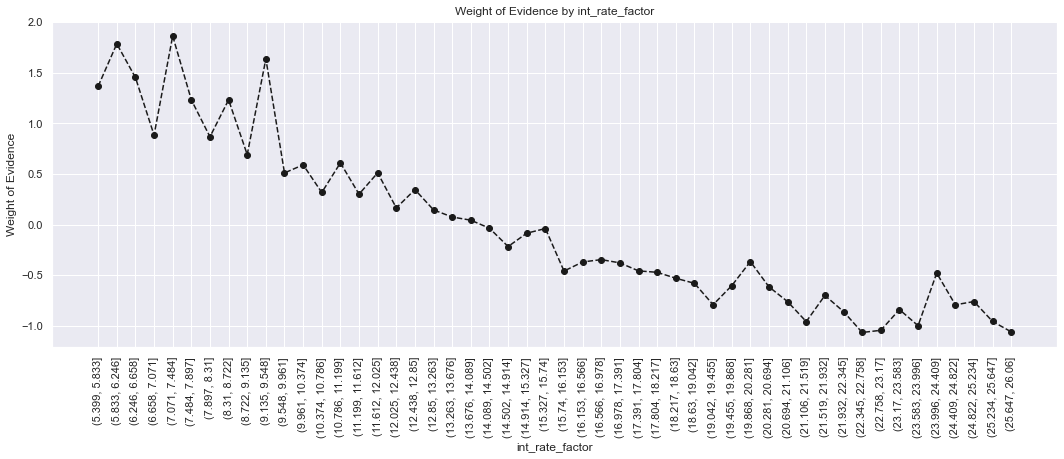

In [247]:
plot_by_woe(df_temp, 90)

1. There are numerous ups and down in the weight intially. Its usually indicates there can be low number of observations.By checking the table, it gets confirmed
2. We will seperate it at 9.48, 12.025,15.74, 20.281,20.281

unlike months variable, this is not an integer.So we need to specify in round variable

In [248]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

#### 5. mths_since_earliest_

In [249]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                     (-0.644, 12.88]      5       1.00        0.00    5.00   
1                      (12.88, 25.76]      0        NaN        0.00     NaN   
2                      (25.76, 38.64]      0        NaN        0.00     NaN   
3                      (38.64, 51.52]      0        NaN        0.00     NaN   
4                       (51.52, 64.4]      0        NaN        0.00     NaN   
5                       (64.4, 77.28]      0        NaN        0.00     NaN   
6                      (77.28, 90.16]      0        NaN        0.00     NaN   
7                     (90.16, 103.04]      0        NaN        0.00     NaN   
8                    (103.04, 115.92]      0        NaN        0.00     NaN   
9                     (115.92, 128.8]      0        NaN        0.00     NaN   
10                    (128.8, 141.68]    256       0.92        0.00  235.00   
11                   (141.68, 154.56]    635       0.89        0.01  568.00   
12                   (154.56, 167.44]    885       0.86        0.01  762.00   
13                   (167.44, 180.32]   1929       0.86        0.02 1658.00   
14                    (180.32, 193.2]   3163       0.86        0.03 2734.00   
15                    (193.2, 206.08]   3513       0.88        0.04 3098.00   
16                   (206.08, 218.96]   3834       0.89        0.04 3394.00   
17                   (218.96, 231.84]   5022       0.89        0.05 4456.00   
18                   (231.84, 244.72]   5854       0.89        0.06 5205.00   
19                    (244.72, 257.6]   7075       0.88        0.08 6239.00   
20                    (257.6, 270.48]   7695       0.89        0.08 6838.00   
21                   (270.48, 283.36]   7083       0.88        0.08 6252.00   
22                   (283.36, 296.24]   6089       0.89        0.07 5415.00   
23                   (296.24, 309.12]   5120       0.89        0.05 4561.00   
24                    (309.12, 322.0]   5040       0.89        0.05 4461.00   
25                    (322.0, 334.88]   4262       0.90        0.05 3822.00   
26                   (334.88, 347.76]   4127       0.90        0.04 3711.00   
27                   (347.76, 360.64]   3026       0.90        0.03 2738.00   
28                   (360.64, 373.52]   2377       0.91        0.03 2154.00   
29                    (373.52, 386.4]   2216       0.90        0.02 1999.00   
30                    (386.4, 399.28]   2255       0.90        0.02 2030.00   
31                   (399.28, 412.16]   1903       0.90        0.02 1709.00   
32                   (412.16, 425.04]   1672       0.92        0.02 1532.00   
33                   (425.04, 437.92]   1268       0.91        0.01 1149.00   
34                    (437.92, 450.8]   1183       0.90        0.01 1070.00   
35                    (450.8, 463.68]   1052       0.92        0.01  970.00   
36                   (463.68, 476.56]    894       0.92        0.01  821.00   
37                   (476.56, 489.44]    652       0.90        0.01  590.00   
38                   (489.44, 502.32]    447       0.91        0.00  408.00   
39                    (502.32, 515.2]    394       0.92        0.00  362.00   
40                    (515.2, 528.08]    408       0.93        0.00  379.00   
41                   (528.08, 540.96]    364       0.91        0.00  332.00   
42                   (540.96, 553.84]    307       0.91        0.00  280.00   
43                   (553.84, 566.72]    241       0.93        0.00  224.00   
44                    (566.72, 579.6]    171       0.91        0.00  155.00   
45                    (579.6, 592.48]    162       0.93        0.00  151.00   
46                   (592.48, 605.36]    158       0.92        0.00  145.00   
47                   (605.36, 618.24]    114       0.90        0.00  103.00   
48                   (618.24, 631.12]     86       0.86        0.00   74.00   
49                    (631.12, 644.0]    320       0.

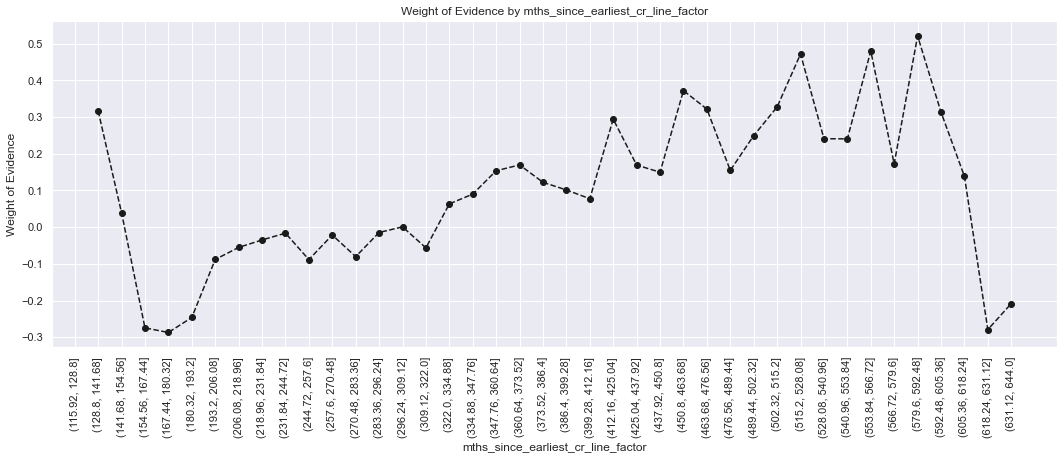

In [250]:
plot_by_woe(df_temp, 90)

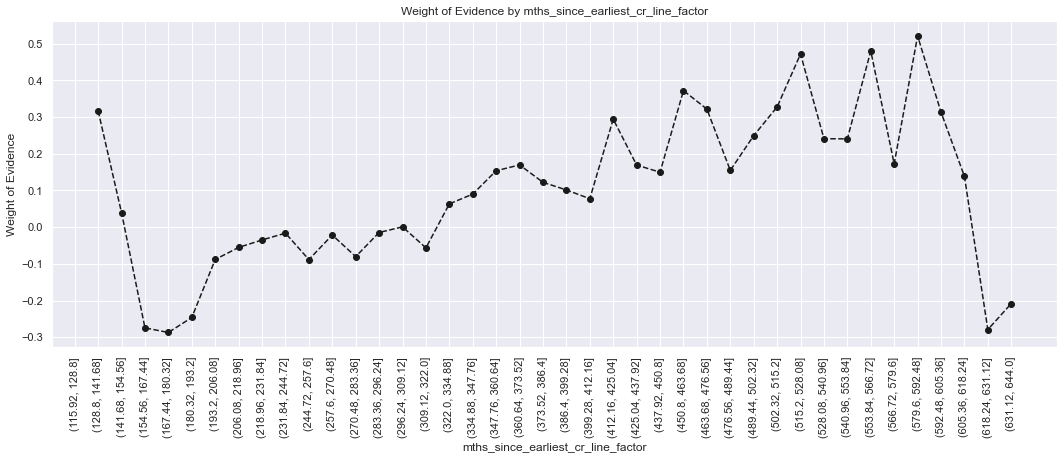

In [251]:
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [252]:
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

#### 6. delinq

In [253]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

delinq_2yrs  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          0.00  76566       0.89        0.82 68216.00 8350.00         0.82   
1          1.00  11297       0.89        0.12 10059.00 1238.00         0.12   
2          2.00   3192       0.89        0.03  2825.00  367.00         0.03   
3          3.00   1134       0.89        0.01  1013.00  121.00         0.01   
4          4.00    510       0.89        0.01   452.00   58.00         0.01   
5          5.00    270       0.91        0.00   246.00   24.00         0.00   
6          6.00    128       0.86        0.00   110.00   18.00         0.00   
7          7.00     67       0.93        0.00    62.00    5.00         0.00   
8          8.00     29       0.90        0.00    26.00    3.00         0.00   
9          9.00     22       0.95        0.00    21.00    1.00         0.00   
10        10.00      9       0.89        0.00     8.00    1.00         0.00   
11        11.00     10       1.00        0.00    10.00    0.00         0.00   
12        12.00      8       0.62        0.00     5.00    3.00         0.00   
13        13.00      7       0.86        0.00     6.00    1.00         0.00   
14        14.00      2       1.00        0.00     2.00    0.00         0.00   
15        15.00      1       1.00        0.00     1.00    0.00         0.00   
16        16.00      1       1.00        0.00     1.00    0.00         0.00   
17        18.00      3       1.00        0.00     3.00    0.00         0.00   
18        19.00      1       1.00        0.00     1.00    0.00         0.00   

    prop_n_bad   WoE  diff_prop_good  diff_WoE  IV  
0         0.82  0.00             NaN       NaN inf  
1         0.12 -0.00            0.00      0.01 inf  
2         0.04 -0.06            0.01      0.05 inf  
3         0.01  0.03            0.01      0.08 inf  
4         0.01 -0.05            0.01      0.07 inf  
5         0.00  0.23            0.02      0.27 inf  
6         0.00 -0.29            0.05      0.52 inf  
7         0.00  0.42            0.07      0.71 inf  
8         0.00  0.06            0.03      0.36 inf  
9         0.00  0.95            0.06      0.89 inf  
10        0.00 -0.02            0.07      0.97 inf  
11        0.00   inf            0.11       inf inf  
12        0.00 -1.59            0.38       inf inf  
13        0.00 -0.31            0.23      1.28 inf  
14        0.00   inf            0.14       inf inf  
15        0.00   inf            0.00       NaN inf  
16        0.00   inf            0.00       NaN inf  
17        0.00   inf            0.00       NaN inf  
18        0.00   inf            0.00       NaN inf

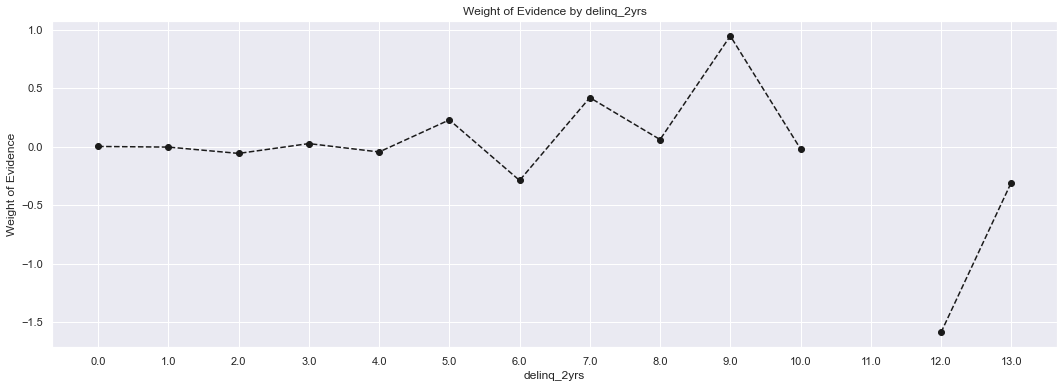

In [254]:
plot_by_woe(df_temp)

In [255]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

#### 7. inq last month

In [256]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

C:\Users\sathi\anaconda3\envs\r4-anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inq_last_6mths  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0             0.00  48295       0.91        0.52 43953.00 4342.00   
1             1.00  25985       0.88        0.28 22929.00 3056.00   
2             2.00  11611       0.86        0.12 10000.00 1611.00   
3             3.00   5086       0.85        0.05  4304.00  782.00   
4             4.00   1431       0.84        0.02  1204.00  227.00   
5             5.00    551       0.84        0.01   464.00   87.00   
6             6.00    211       0.76        0.00   161.00   50.00   
7             7.00     36       0.53        0.00    19.00   17.00   
8             8.00     21       0.52        0.00    11.00   10.00   
9             9.00      7       0.43        0.00     3.00    4.00   
10           10.00      7       0.86        0.00     6.00    1.00   
11           11.00      7       1.00        0.00     7.00    0.00   
12           12.00      3       1.00        0.00     3.00    0.00   
13           13.00      1       0.00        0.00     0.00    1.00   
14           14.00      1       0.00        0.00     0.00    1.00   
15           18.00      2       0.50        0.00     1.00    1.00   
16           19.00      1       1.00        0.00     1.00    0.00   
17           24.00      1       1.00        0.00     1.00    0.00   

    prop_n_good  prop_n_bad   WoE  diff_prop_good  diff_WoE  IV  
0          0.53        0.43  0.22             NaN       NaN inf  
1          0.28        0.30 -0.08            0.03      0.30 inf  
2          0.12        0.16 -0.27            0.02      0.19 inf  
3          0.05        0.08 -0.39            0.02      0.12 inf  
4          0.01        0.02 -0.43            0.00      0.04 inf  
5          0.01        0.01 -0.42            0.00      0.01 inf  
6          0.00        0.00 -0.93            0.08      0.50 inf  
7          0.00        0.00 -1.99            0.24      1.06 inf  
8          0.00        0.00 -2.00            0.00      0.02 inf  
9          0.00        0.00 -2.39            0.10      0.38 inf  
10         0.00        0.00 -0.31            0.43      2.08 inf  
11         0.00        0.00   inf            0.14       inf inf  
12         0.00        0.00   inf            0.00       NaN inf  
13         0.00        0.00  -inf            1.00       inf inf  
14         0.00        0.00  -inf            0.00       NaN inf  
15         0.00        0.00 -2.10            0.50       inf inf  
16         0.00        0.00   inf            0.50       inf inf  
17         0.00        0.00   inf            0.00       NaN inf

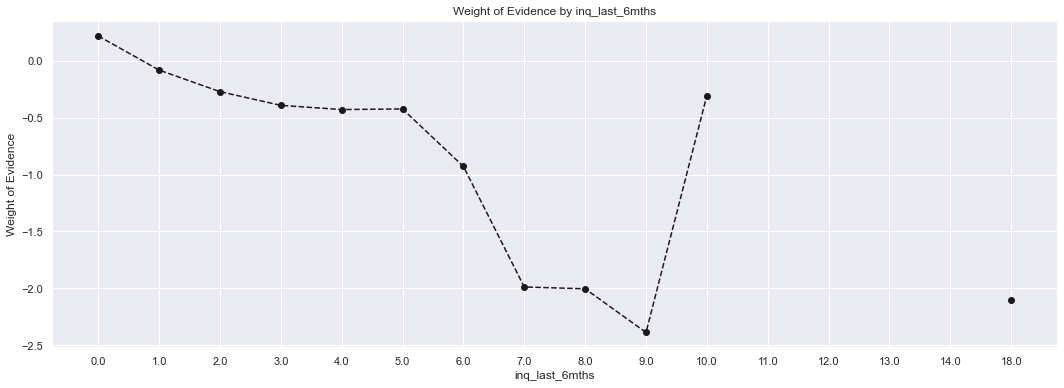

In [257]:
plot_by_woe(df_temp)

In [258]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

#### 8. open acc

In [259]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

open_acc  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0       0.00      7       1.00        0.00    7.00   0.00         0.00   
1       1.00     32       0.88        0.00   28.00   4.00         0.00   
2       2.00    334       0.84        0.00  280.00  54.00         0.00   
3       3.00   1122       0.85        0.01  957.00 165.00         0.01   
4       4.00   2560       0.89        0.03 2284.00 276.00         0.03   
5       5.00   4403       0.89        0.05 3925.00 478.00         0.05   
6       6.00   6216       0.89        0.07 5537.00 679.00         0.07   
7       7.00   7433       0.89        0.08 6592.00 841.00         0.08   
8       8.00   8314       0.89        0.09 7428.00 886.00         0.09   
9       9.00   8768       0.89        0.09 7788.00 980.00         0.09   
10     10.00   8576       0.89        0.09 7625.00 951.00         0.09   
11     11.00   7740       0.89        0.08 6923.00 817.00         0.08   
12     12.00   6886       0.89        0.07 6108.00 778.00         0.07   
13     13.00   5914       0.89        0.06 5283.00 631.00         0.06   
14     14.00   4960       0.90        0.05 4443.00 517.00         0.05   
15     15.00   4006       0.89        0.04 3574.00 432.00         0.04   
16     16.00   3269       0.90        0.04 2936.00 333.00         0.04   
17     17.00   2680       0.89        0.03 2377.00 303.00         0.03   
18     18.00   2259       0.90        0.02 2038.00 221.00         0.02   
19     19.00   1811       0.89        0.02 1618.00 193.00         0.02   
20     20.00   1444       0.90        0.02 1297.00 147.00         0.02   
21     21.00   1037       0.88        0.01  913.00 124.00         0.01   
22     22.00    784       0.89        0.01  696.00  88.00         0.01   
23     23.00    628       0.90        0.01  568.00  60.00         0.01   
24     24.00    473       0.89        0.01  421.00  52.00         0.01   
25     25.00    391       0.88        0.00  345.00  46.00         0.00   
26     26.00    250       0.88        0.00  221.00  29.00         0.00   
27     27.00    204       0.91        0.00  186.00  18.00         0.00   
28     28.00    153       0.90        0.00  137.00  16.00         0.00   
29     29.00    128       0.84        0.00  108.00  20.00         0.00   
30     30.00    107       0.91        0.00   97.00  10.00         0.00   
31     31.00     73       0.89        0.00   65.00   8.00         0.00   
32     32.00     62       0.95        0.00   59.00   3.00         0.00   
33     33.00     47       0.85        0.00   40.00   7.00         0.00   
34     34.00     40       0.82        0.00   33.00   7.00         0.00   
35     35.00     33       0.94        0.00   31.00   2.00         0.00   
36     36.00     22       0.77        0.00   17.00   5.00         0.00   
37     37.00     21       0.86        0.00   18.00   3.00         0.00   
38     38.00     14       0.93        0.00   13.00   1.00         0.00   
39     39.00     12       0.92        0.00   11.00   1.00         0.00   
40     40.00      9       0.56        0.00    5.00   4.00         0.00   
41     41.00      6       1.00        0.00    6.00   0.00         0.00   
42     42.00      7       1.00        0.00    7.00   0.00         0.00   
43     43.00      4       1.00        0.00    4.00   0.00         0.00   
44     45.00      4       1.00        0.00    4.00   0.00         0.00   
45     46.00      2       1.00        0.00    2.00   0.00         0.00   
46     48.00      2       1.00        0.00    2.00   0.00         0.00   
47     49.00      2       1.00        0.00    2.00   0.00         0.00   
48     50.00      1       1.00        0.00    1.00   0.00         0.00   
49     52.00      1       1.00        0.00    1.00   0.00         0.00   
50     53.00      2       1.00        0.00    2.00   0.00         0.00   
51     58.00      3       1.00        0.00    3.00   0.00         0.00   
52     61.00      1       1.00        0.00    1.00   0.00         0.00   

    pro

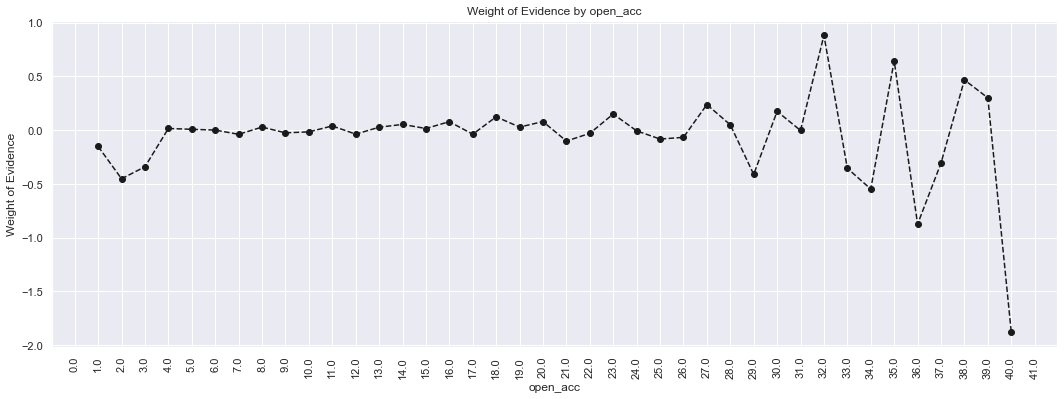

In [260]:
plot_by_woe(df_temp, 90)

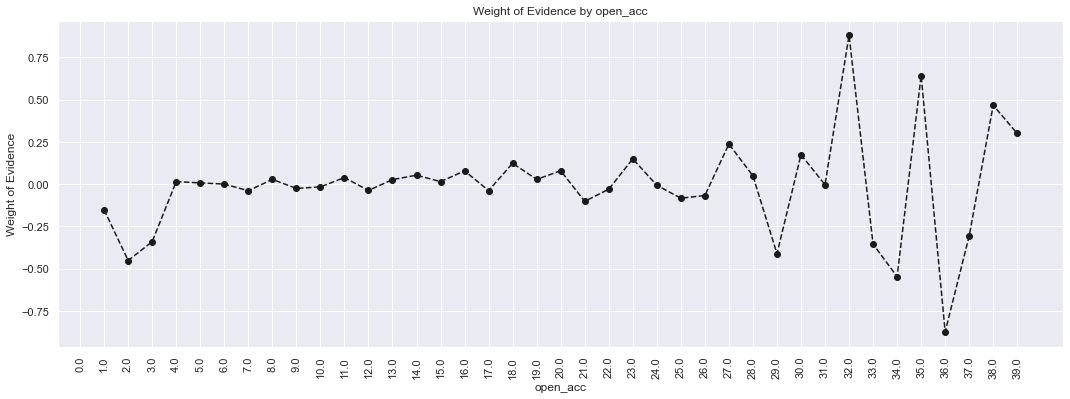

In [261]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [262]:
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

#### 9. pub rec

In [263]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

pub_rec  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0      0.00  80923       0.89        0.87 71955.00 8968.00         0.87   
1      1.00  10670       0.90        0.11  9615.00 1055.00         0.12   
2      2.00   1097       0.90        0.01   992.00  105.00         0.01   
3      3.00    331       0.90        0.00   298.00   33.00         0.00   
4      4.00    112       0.86        0.00    96.00   16.00         0.00   
5      5.00     73       0.90        0.00    66.00    7.00         0.00   
6      6.00     19       0.89        0.00    17.00    2.00         0.00   
7      7.00     14       0.79        0.00    11.00    3.00         0.00   
8      8.00      5       0.80        0.00     4.00    1.00         0.00   
9      9.00      2       1.00        0.00     2.00    0.00         0.00   
10    10.00      3       1.00        0.00     3.00    0.00         0.00   
11    11.00      5       1.00        0.00     5.00    0.00         0.00   
12    12.00      1       1.00        0.00     1.00    0.00         0.00   
13    14.00      1       1.00        0.00     1.00    0.00         0.00   
14    49.00      1       1.00        0.00     1.00    0.00         0.00   

    prop_n_bad   WoE  diff_prop_good  diff_WoE  IV  
0         0.88 -0.02             NaN       NaN inf  
1         0.10  0.11            0.01      0.13 inf  
2         0.01  0.15            0.00      0.04 inf  
3         0.00  0.10            0.00      0.05 inf  
4         0.00 -0.31            0.04      0.41 inf  
5         0.00  0.15            0.05      0.45 inf  
6         0.00  0.04            0.01      0.10 inf  
7         0.00 -0.80            0.11      0.84 inf  
8         0.00 -0.71            0.01      0.09 inf  
9         0.00   inf            0.20       inf inf  
10        0.00   inf            0.00       NaN inf  
11        0.00   inf            0.00       NaN inf  
12        0.00   inf            0.00       NaN inf  
13        0.00   inf            0.00       NaN inf  
14        0.00   inf            0.00       NaN inf

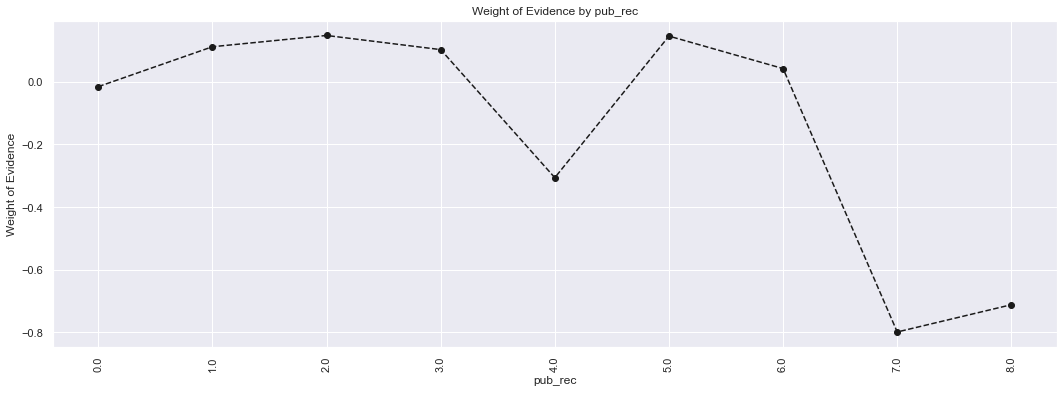

In [264]:
plot_by_woe(df_temp, 90)

In [265]:
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

#### 10. total acc

In [266]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (-0.156, 3.12]    125       0.78        0.00    97.00   28.00   
1       (3.12, 6.24]   1499       0.85        0.02  1275.00  224.00   
2       (6.24, 9.36]   3715       0.87        0.04  3239.00  476.00   
3      (9.36, 12.48]   6288       0.87        0.07  5501.00  787.00   
4      (12.48, 15.6]   8289       0.89        0.09  7363.00  926.00   
5      (15.6, 18.72]   9843       0.89        0.11  8762.00 1081.00   
6     (18.72, 21.84]  10270       0.89        0.11  9180.00 1090.00   
7     (21.84, 24.96]   9971       0.89        0.11  8902.00 1069.00   
8     (24.96, 28.08]  11873       0.89        0.13 10592.00 1281.00   
9      (28.08, 31.2]   7289       0.89        0.08  6507.00  782.00   
10     (31.2, 34.32]   6151       0.90        0.07  5552.00  599.00   
11    (34.32, 37.44]   4745       0.91        0.05  4298.00  447.00   
12    (37.44, 40.56]   3615       0.90        0.04  3244.00  371.00   
13    (40.56, 43.68]   2883       0.89        0.03  2566.00  317.00   
14     (43.68, 46.8]   1938       0.89        0.02  1728.00  210.00   
15     (46.8, 49.92]   1478       0.91        0.02  1339.00  139.00   
16    (49.92, 53.04]   1309       0.90        0.01  1181.00  128.00   
17    (53.04, 56.16]    640       0.89        0.01   572.00   68.00   
18    (56.16, 59.28]    428       0.87        0.00   374.00   54.00   
19     (59.28, 62.4]    386       0.88        0.00   339.00   47.00   
20     (62.4, 65.52]    322       0.84        0.00   272.00   50.00   
21    (65.52, 68.64]     57       0.95        0.00    54.00    3.00   
22    (68.64, 71.76]     43       0.91        0.00    39.00    4.00   
23    (71.76, 74.88]     24       1.00        0.00    24.00    0.00   
24     (74.88, 78.0]     26       0.92        0.00    24.00    2.00   
25     (78.0, 81.12]     13       0.77        0.00    10.00    3.00   
26    (81.12, 84.24]     11       0.91        0.00    10.00    1.00   
27    (84.24, 87.36]      8       0.88        0.00     7.00    1.00   
28    (87.36, 90.48]      6       0.83        0.00     5.00    1.00   
29     (90.48, 93.6]      7       0.86        0.00     6.00    1.00   
30     (93.6, 96.72]      1       1.00        0.00     1.00    0.00   
31    (96.72, 99.84]      3       1.00        0.00     3.00    0.00   
32   (99.84, 102.96]      0        NaN        0.00      NaN     NaN   
33  (102.96, 106.08]      0        NaN        0.00      NaN     NaN   
34   (106.08, 109.2]      0        NaN        0.00      NaN     NaN   
35   (109.2, 112.32]      0        NaN        0.00      NaN     NaN   
36  (112.32, 115.44]      0        NaN        0.00      NaN     NaN   
37  (115.44, 118.56]      0        NaN        0.00      NaN     NaN   
38  (118.56, 121.68]      0        NaN        0.00      NaN     NaN   
39   (121.68, 124.8]      0        NaN        0.00      NaN     NaN   
40   (124.8, 127.92]      0        NaN        0.00      NaN     NaN   
41  (127.92, 131.04]      0        NaN        0.00      NaN     NaN   
42  (131.04, 134.16]      0        NaN        0.00      NaN     NaN   
43  (134.16, 137.28]      0        NaN        0.00      NaN     NaN   
44   (137.28, 140.4]      0        NaN        0.00      NaN     NaN   
45   (140.4, 143.52]      0        NaN        0.00      NaN     NaN   
46  (143.52, 146.64]      0        NaN        0.00      NaN     NaN   
47  (146.64, 149.76]      0        NaN        0.00      NaN     NaN   
48  (149.76, 152.88]      0        NaN        0.00      NaN     NaN   
49   (152.88, 156.0]      1       1.00        0.00     1.00    0.00   

    prop_n_good  prop_n_bad   WoE  diff_prop_good  diff_WoE  IV  
0          0.00        0.00 -0.86             NaN       NaN inf  
1          0.02        0.02 -0.36            0.07      0.50 inf  
2          0.04        0.05 -0.18            0.02      0.18 inf  
3          0.07        0.08 -0.15            0.00      0.03 inf  
4          0.09        0.09 -0.02            0.01   

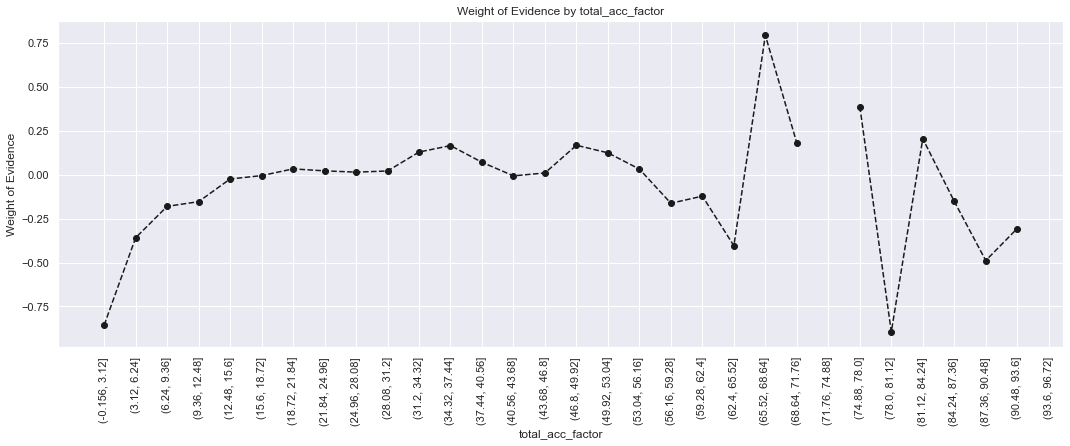

In [267]:
plot_by_woe(df_temp, 90)

In [268]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

#### 11. acc_delinq

In [269]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

acc_now_delinq  n_obs  prop_good  prop_n_obs   n_good    n_bad  \
0            0.00  92871       0.89        1.00 82732.00 10139.00   
1            1.00    360       0.87        0.00   314.00    46.00   
2            2.00     22       0.82        0.00    18.00     4.00   
3            3.00      4       0.75        0.00     3.00     1.00   

   prop_n_good  prop_n_bad   WoE  diff_prop_good  diff_WoE   IV  
0         1.00        0.99  0.00             NaN       NaN 0.00  
1         0.00        0.00 -0.18            0.02      0.18 0.00  
2         0.00        0.00 -0.59            0.05      0.42 0.00  
3         0.00        0.00 -1.00            0.07      0.41 0.00

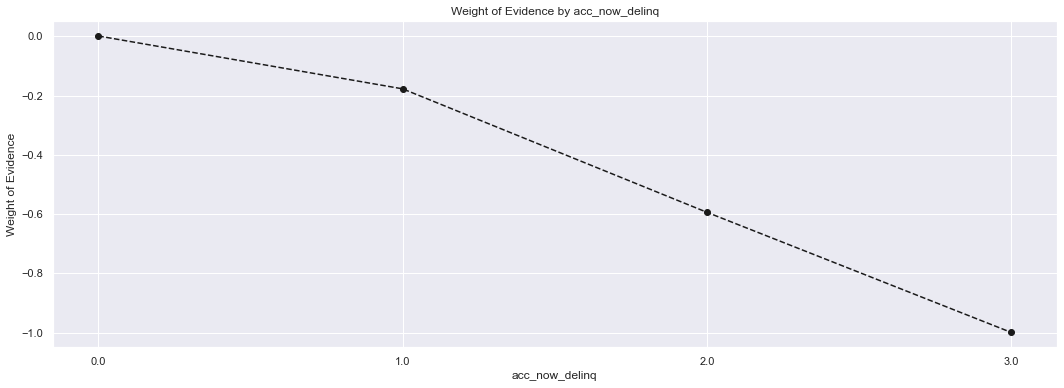

In [270]:
plot_by_woe(df_temp)

In [271]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

#### 12. total_rev_hi_lim_factor

In [272]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

C:\Users\sathi\anaconda3\envs\r4-anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0          (-2013.133, 1006.566]    238       0.84        0.00  200.00  38.00   
1           (1006.566, 2013.133]    678       0.83        0.01  561.00 117.00   
2             (2013.133, 3019.7]   1121       0.85        0.01  956.00 165.00   
3             (3019.7, 4026.266]   1461       0.88        0.02 1283.00 178.00   
4           (4026.266, 5032.832]   2163       0.87        0.02 1877.00 286.00   
5           (5032.832, 6039.399]   2411       0.87        0.03 2107.00 304.00   
6           (6039.399, 7045.966]   2376       0.87        0.03 2070.00 306.00   
7           (7045.966, 8052.532]   2825       0.88        0.03 2473.00 352.00   
8           (8052.532, 9059.098]   2686       0.87        0.03 2345.00 341.00   
9          (9059.098, 10065.665]   3514       0.87        0.04 3058.00 456.00   
10        (10065.665, 11072.232]   2599       0.88        0.03 2294.00 305.00   
11        (11072.232, 12078.798]   3226       0.88        0.03 2824.00 402.00   
12        (12078.798, 13085.364]   2673       0.88        0.03 2343.00 330.00   
13        (13085.364, 14091.931]   2702       0.88        0.03 2389.00 313.00   
14        (14091.931, 15098.498]   3151       0.88        0.03 2787.00 364.00   
15        (15098.498, 16105.064]   2999       0.87        0.03 2621.00 378.00   
16         (16105.064, 17111.63]   2401       0.89        0.03 2138.00 263.00   
17         (17111.63, 18118.197]   2545       0.88        0.03 2237.00 308.00   
18        (18118.197, 19124.764]   2282       0.88        0.02 2004.00 278.00   
19         (19124.764, 20131.33]   2717       0.88        0.03 2388.00 329.00   
20         (20131.33, 21137.896]   2167       0.89        0.02 1935.00 232.00   
21        (21137.896, 22144.463]   1999       0.89        0.02 1786.00 213.00   
22         (22144.463, 23151.03]   1903       0.89        0.02 1700.00 203.00   
23         (23151.03, 24157.596]   1963       0.89        0.02 1748.00 215.00   
24        (24157.596, 25164.163]   2075       0.89        0.02 1841.00 234.00   
25        (25164.163, 26170.729]   1656       0.90        0.02 1490.00 166.00   
26        (26170.729, 27177.296]   1561       0.89        0.02 1387.00 174.00   
27        (27177.296, 28183.862]   1617       0.89        0.02 1439.00 178.00   
28        (28183.862, 29190.428]   1483       0.90        0.02 1340.00 143.00   
29        (29190.428, 30196.995]   1486       0.89        0.02 1325.00 161.00   
30        (30196.995, 31203.562]   1428       0.90        0.02 1289.00 139.00   
31        (31203.562, 32210.128]   1224       0.91        0.01 1111.00 113.00   
32        (32210.128, 33216.694]   1177       0.90        0.01 1055.00 122.00   
33        (33216.694, 34223.261]   1147       0.89        0.01 1025.00 122.00   
34        (34223.261, 35229.828]   1286       0.89        0.01 1147.00 139.00   
35        (35229.828, 36236.394]   1000       0.90        0.01  897.00 103.00   
36         (36236.394, 37242.96]    934       0.91        0.01  846.00  88.00   
37         (37242.96, 38249.527]    902       0.88        0.01  793.00 109.00   
38        (38249.527, 39256.094]    891       0.90        0.01  802.00  89.00   
39         (39256.094, 40262.66]    828       0.90        0.01  748.00  80.00   
40         (40262.66, 41269.227]    797       0.91        0.01  724.00  73.00   
41        (41269.227, 42275.793]    729       0.91        0.01  667.00  62.00   
42         (42275.793, 43282.36]    716       0.90        0.01  641.00  75.00   
43         (43282.36, 44288.926]    755       0.91        0.01  688.00  67.00   
44        (44288.926, 45295.492]    647       0.92        0.01  595.00  52.00   
45        (45295.492, 46302.059]    660       0.92        0.01  608.00  52.00   
46        (46302.059, 47308.626]    550       0.93        0.01  513.00  37.00   
47        (47308.626, 48315.192]    592       0.93        0.01  551.00  41.00   
48        (48315.192, 49321.758]    522 

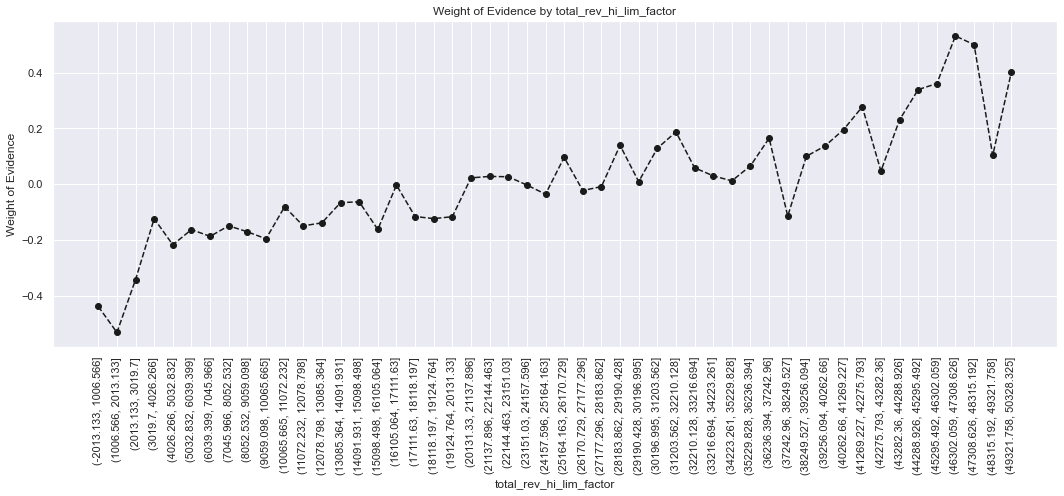

In [273]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [274]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

#### 12. installment factor

In [275]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

installment_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (14.369, 43.585]    485       0.87        0.01  423.00  62.00   
1       (43.585, 71.41]   1246       0.90        0.01 1127.00 119.00   
2       (71.41, 99.235]   1731       0.90        0.02 1550.00 181.00   
3      (99.235, 127.06]   2292       0.90        0.02 2055.00 237.00   
4     (127.06, 154.885]   2602       0.89        0.03 2306.00 296.00   
5     (154.885, 182.71]   4133       0.90        0.04 3710.00 423.00   
6     (182.71, 210.535]   4109       0.91        0.04 3719.00 390.00   
7     (210.535, 238.36]   3730       0.90        0.04 3364.00 366.00   
8     (238.36, 266.185]   4660       0.90        0.05 4193.00 467.00   
9     (266.185, 294.01]   4975       0.89        0.05 4422.00 553.00   
10    (294.01, 321.835]   5186       0.91        0.06 4700.00 486.00   
11    (321.835, 349.66]   6432       0.89        0.07 5741.00 691.00   
12    (349.66, 377.485]   4758       0.88        0.05 4195.00 563.00   
13    (377.485, 405.31]   4352       0.90        0.05 3918.00 434.00   
14    (405.31, 433.135]   3429       0.88        0.04 3027.00 402.00   
15    (433.135, 460.96]   3225       0.88        0.03 2836.00 389.00   
16    (460.96, 488.785]   3865       0.89        0.04 3457.00 408.00   
17    (488.785, 516.61]   3861       0.88        0.04 3414.00 447.00   
18    (516.61, 544.435]   2730       0.87        0.03 2372.00 358.00   
19    (544.435, 572.26]   2564       0.88        0.03 2250.00 314.00   
20    (572.26, 600.085]   2434       0.87        0.03 2127.00 307.00   
21    (600.085, 627.91]   2294       0.90        0.02 2069.00 225.00   
22    (627.91, 655.735]   2091       0.90        0.02 1884.00 207.00   
23    (655.735, 683.56]   2295       0.89        0.02 2054.00 241.00   
24    (683.56, 711.385]   1650       0.88        0.02 1447.00 203.00   
25    (711.385, 739.21]   1252       0.89        0.01 1117.00 135.00   
26    (739.21, 767.035]   1360       0.90        0.01 1221.00 139.00   
27    (767.035, 794.86]   1160       0.89        0.01 1028.00 132.00   
28    (794.86, 822.685]   1023       0.89        0.01  909.00 114.00   
29    (822.685, 850.51]    967       0.89        0.01  856.00 111.00   
30    (850.51, 878.335]   1046       0.89        0.01  936.00 110.00   
31    (878.335, 906.16]    707       0.86        0.01  609.00  98.00   
32    (906.16, 933.985]    604       0.86        0.01  517.00  87.00   
33    (933.985, 961.81]    635       0.86        0.01  547.00  88.00   
34    (961.81, 989.635]    460       0.85        0.00  391.00  69.00   
35   (989.635, 1017.46]    441       0.85        0.00  377.00  64.00   
36  (1017.46, 1045.285]    305       0.88        0.00  267.00  38.00   
37  (1045.285, 1073.11]    206       0.88        0.00  181.00  25.00   
38  (1073.11, 1100.935]    228       0.89        0.00  204.00  24.00   
39  (1100.935, 1128.76]    247       0.93        0.00  230.00  17.00   
40  (1128.76, 1156.585]    227       0.92        0.00  208.00  19.00   
41  (1156.585, 1184.41]    287       0.90        0.00  257.00  30.00   
42  (1184.41, 1212.235]    308       0.91        0.00  279.00  29.00   
43  (1212.235, 1240.06]    284       0.90        0.00  256.00  28.00   
44  (1240.06, 1267.885]    159       0.86        0.00  137.00  22.00   
45  (1267.885, 1295.71]    132       0.83        0.00  110.00  22.00   
46  (1295.71, 1323.535]     47       0.79        0.00   37.00  10.00   
47  (1323.535, 1351.36]     21       0.71        0.00   15.00   6.00   
48  (1351.36, 1379.185]     15       0.73        0.00   11.00   4.00   
49  (1379.185, 1407.01]      7       1.00        0.00    7.00   0.00   

    prop_n_good  prop_n_bad   WoE  diff_prop_good  diff_WoE  IV  
0          0.01        0.01 -0.18             NaN       NaN inf  
1          0.01        0.01  0.15            0.03      0.33 inf  
2          0.02        0.02  0.05            0.01      0.10 inf  
3          0.02        0.02  0.06            0.00      0.01 inf  
4 

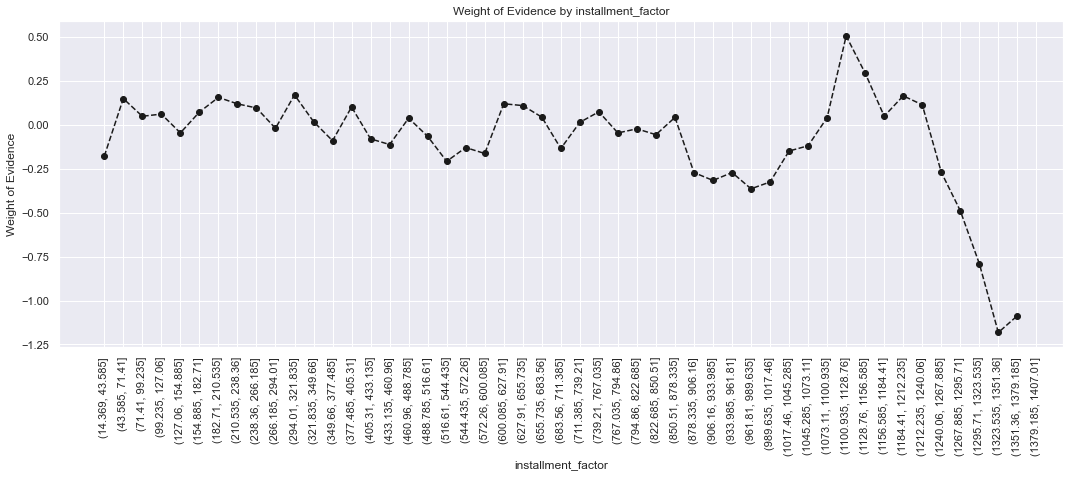

In [276]:
plot_by_woe(df_temp, 90)

#### 13. funded amnt factor

In [277]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (465.5, 1190.0]    319       0.88        0.00  281.00  38.00   
1     (1190.0, 1880.0]    800       0.90        0.01  717.00  83.00   
2     (1880.0, 2570.0]   1513       0.90        0.02 1362.00 151.00   
3     (2570.0, 3260.0]   1817       0.89        0.02 1624.00 193.00   
4     (3260.0, 3950.0]   1245       0.89        0.01 1110.00 135.00   
5     (3950.0, 4640.0]   2298       0.88        0.02 2029.00 269.00   
6     (4640.0, 5330.0]   3957       0.90        0.04 3554.00 403.00   
7     (5330.0, 6020.0]   4186       0.91        0.04 3795.00 391.00   
8     (6020.0, 6710.0]   1718       0.88        0.02 1515.00 203.00   
9     (6710.0, 7400.0]   2880       0.89        0.03 2573.00 307.00   
10    (7400.0, 8090.0]   4266       0.90        0.05 3819.00 447.00   
11    (8090.0, 8780.0]   1617       0.89        0.02 1440.00 177.00   
12    (8780.0, 9470.0]   2320       0.89        0.02 2062.00 258.00   
13   (9470.0, 10160.0]   8552       0.89        0.09 7628.00 924.00   
14  (10160.0, 10850.0]   1642       0.87        0.02 1433.00 209.00   
15  (10850.0, 11540.0]   2091       0.88        0.02 1842.00 249.00   
16  (11540.0, 12230.0]   5767       0.91        0.06 5226.00 541.00   
17  (12230.0, 12920.0]   1228       0.88        0.01 1075.00 153.00   
18  (12920.0, 13610.0]   1860       0.90        0.02 1672.00 188.00   
19  (13610.0, 14300.0]   2087       0.90        0.02 1877.00 210.00   
20  (14300.0, 14990.0]   1255       0.89        0.01 1113.00 142.00   
21  (14990.0, 15680.0]   5441       0.90        0.06 4914.00 527.00   
22  (15680.0, 16370.0]   2920       0.88        0.03 2577.00 343.00   
23  (16370.0, 17060.0]   1625       0.88        0.02 1430.00 195.00   
24  (17060.0, 17750.0]    921       0.85        0.01  783.00 138.00   
25  (17750.0, 18440.0]   2898       0.89        0.03 2567.00 331.00   
26  (18440.0, 19130.0]    989       0.86        0.01  849.00 140.00   
27  (19130.0, 19820.0]   1057       0.88        0.01  925.00 132.00   
28  (19820.0, 20510.0]   5055       0.90        0.05 4533.00 522.00   
29  (20510.0, 21200.0]   1635       0.90        0.02 1464.00 171.00   
30  (21200.0, 21890.0]    476       0.83        0.01  397.00  79.00   
31  (21890.0, 22580.0]   1028       0.88        0.01  908.00 120.00   
32  (22580.0, 23270.0]    633       0.89        0.01  565.00  68.00   
33  (23270.0, 23960.0]    497       0.84        0.01  416.00  81.00   
34  (23960.0, 24650.0]   2491       0.90        0.03 2237.00 254.00   
35  (24650.0, 25340.0]   2500       0.90        0.03 2258.00 242.00   
36  (25340.0, 26030.0]    487       0.85        0.01  415.00  72.00   
37  (26030.0, 26720.0]    299       0.82        0.00  246.00  53.00   
38  (26720.0, 27410.0]    410       0.87        0.00  357.00  53.00   
39  (27410.0, 28100.0]   1604       0.90        0.02 1437.00 167.00   
40  (28100.0, 28790.0]    204       0.86        0.00  175.00  29.00   
41  (28790.0, 29480.0]    286       0.85        0.00  242.00  44.00   
42  (29480.0, 30170.0]   1762       0.88        0.02 1550.00 212.00   
43  (30170.0, 30860.0]    133       0.83        0.00  110.00  23.00   
44  (30860.0, 31550.0]    218       0.83        0.00  181.00  37.00   
45  (31550.0, 32240.0]    367       0.92        0.00  338.00  29.00   
46  (32240.0, 32930.0]    139       0.88        0.00  123.00  16.00   
47  (32930.0, 33620.0]    275       0.90        0.00  248.00  27.00   
48  (33620.0, 34310.0]    142       0.89        0.00  127.00  15.00   
49  (34310.0, 35000.0]   3347       0.88        0.04 2948.00 399.00   

    prop_n_good  prop_n_bad   WoE  diff_prop_good  diff_WoE   IV  
0          0.00        0.00 -0.10             NaN       NaN 0.02  
1          0.01        0.01  0.06            0.02      0.16 0.02  
2          0.02        0.01  0.10            0.00      0.04 0.02  
3          0.02        0.02  0.03            0.01      0.07 0.02  
4          0.01        0.01  0.01            0.

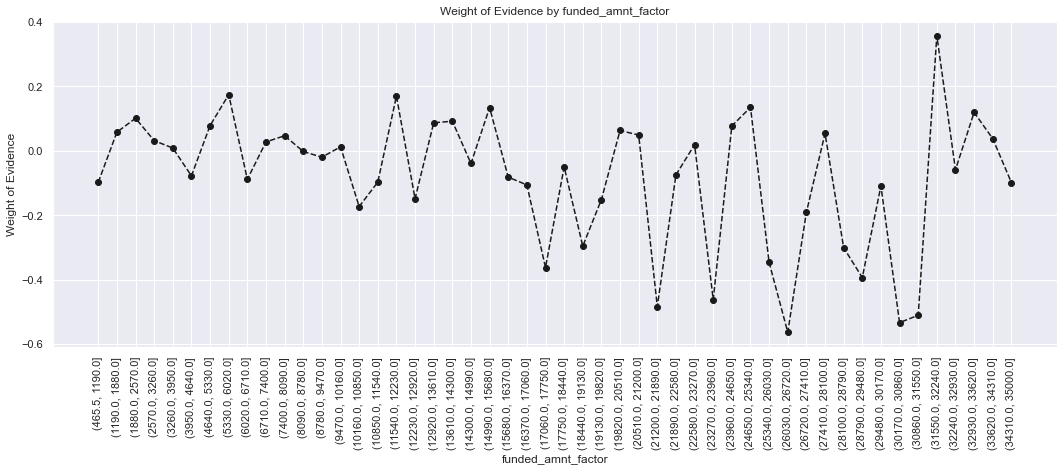

In [278]:
plot_by_woe(df_temp, 90)

Clearly, the pattern visible from the plot is almost horizontal. So we can avoid this variable.

#### 14. annual inc

In [279]:
df_inputs_prepr["annual_inc_factor"] = pd.cut(df_inputs_prepr["annual_inc"],50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-2695.2, 154704.0]  89203       0.89        0.96 79305.00 9898.00   
1     (154704.0, 304608.0]   3626       0.93        0.04  3360.00  266.00   
2     (304608.0, 454512.0]    282       0.93        0.00   262.00   20.00   
3     (454512.0, 604416.0]     86       0.97        0.00    83.00    3.00   
4     (604416.0, 754320.0]     23       0.96        0.00    22.00    1.00   
5     (754320.0, 904224.0]     18       0.94        0.00    17.00    1.00   
6    (904224.0, 1054128.0]      7       1.00        0.00     7.00    0.00   
7   (1054128.0, 1204032.0]      6       1.00        0.00     6.00    0.00   
8   (1204032.0, 1353936.0]      2       0.50        0.00     1.00    1.00   
9   (1353936.0, 1503840.0]      2       1.00        0.00     2.00    0.00   
10  (1503840.0, 1653744.0]      0        NaN        0.00      NaN     NaN   
11  (1653744.0, 1803648.0]      0        NaN        0.00      NaN     NaN   
12  (1803648.0, 1953552.0]      0        NaN        0.00      NaN     NaN   
13  (1953552.0, 2103456.0]      0        NaN        0.00      NaN     NaN   
14  (2103456.0, 2253360.0]      0        NaN        0.00      NaN     NaN   
15  (2253360.0, 2403264.0]      0        NaN        0.00      NaN     NaN   
16  (2403264.0, 2553168.0]      0        NaN        0.00      NaN     NaN   
17  (2553168.0, 2703072.0]      0        NaN        0.00      NaN     NaN   
18  (2703072.0, 2852976.0]      0        NaN        0.00      NaN     NaN   
19  (2852976.0, 3002880.0]      0        NaN        0.00      NaN     NaN   
20  (3002880.0, 3152784.0]      0        NaN        0.00      NaN     NaN   
21  (3152784.0, 3302688.0]      0        NaN        0.00      NaN     NaN   
22  (3302688.0, 3452592.0]      0        NaN        0.00      NaN     NaN   
23  (3452592.0, 3602496.0]      0        NaN        0.00      NaN     NaN   
24  (3602496.0, 3752400.0]      0        NaN        0.00      NaN     NaN   
25  (3752400.0, 3902304.0]      0        NaN        0.00      NaN     NaN   
26  (3902304.0, 4052208.0]      0        NaN        0.00      NaN     NaN   
27  (4052208.0, 4202112.0]      0        NaN        0.00      NaN     NaN   
28  (4202112.0, 4352016.0]      0        NaN        0.00      NaN     NaN   
29  (4352016.0, 4501920.0]      0        NaN        0.00      NaN     NaN   
30  (4501920.0, 4651824.0]      0        NaN        0.00      NaN     NaN   
31  (4651824.0, 4801728.0]      0        NaN        0.00      NaN     NaN   
32  (4801728.0, 4951632.0]      0        NaN        0.00      NaN     NaN   
33  (4951632.0, 5101536.0]      0        NaN        0.00      NaN     NaN   
34  (5101536.0, 5251440.0]      0        NaN        0.00      NaN     NaN   
35  (5251440.0, 5401344.0]      0        NaN        0.00      NaN     NaN   
36  (5401344.0, 5551248.0]      0        NaN        0.00      NaN     NaN   
37  (5551248.0, 5701152.0]      0        NaN        0.00      NaN     NaN   
38  (5701152.0, 5851056.0]      0        NaN        0.00      NaN     NaN   
39  (5851056.0, 6000960.0]      0        NaN        0.00      NaN     NaN   
40  (6000960.0, 6150864.0]      0        NaN        0.00      NaN     NaN   
41  (6150864.0, 6300768.0]      0        NaN        0.00      NaN     NaN   
42  (6300768.0, 6450672.0]      0        NaN        0.00      NaN     NaN   
43  (6450672.0, 6600576.0]      0        NaN        0.00      NaN     NaN   
44  (6600576.0, 6750480.0]      0        NaN        0.00      NaN     NaN   
45  (6750480.0, 6900384.0]      0        NaN        0.00      NaN     NaN   
46  (6900384.0, 7050288.0]      0        NaN        0.00      NaN     NaN   
47  (7050288.0, 7200192.0]      0        NaN        0.00      NaN     NaN   
48  (7200192.0, 7350096.0]      0        NaN        0.00      NaN     NaN   
49  (7350096.0, 7500000.0]      2       1.00        0.00     2.00    0.00   

    prop_n_good  prop_n_bad   WoE  diff_prop_good  diff_WoE  IV  
0          0.95

The first row has more number of observations. Nearly 90% of the observations. So lets cut it further.

In [280]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (-2695.2, 79752.0]  62621       0.88        0.67 54977.00 7644.00   
1      (79752.0, 154704.0]  26582       0.92        0.29 24328.00 2254.00   
2     (154704.0, 229656.0]   2916       0.93        0.03  2701.00  215.00   
3     (229656.0, 304608.0]    710       0.93        0.01   659.00   51.00   
4     (304608.0, 379560.0]    171       0.93        0.00   159.00   12.00   
5     (379560.0, 454512.0]    111       0.93        0.00   103.00    8.00   
6     (454512.0, 529464.0]     53       0.96        0.00    51.00    2.00   
7     (529464.0, 604416.0]     33       0.97        0.00    32.00    1.00   
8     (604416.0, 679368.0]     10       1.00        0.00    10.00    0.00   
9     (679368.0, 754320.0]     13       0.92        0.00    12.00    1.00   
10    (754320.0, 829272.0]      5       1.00        0.00     5.00    0.00   
11    (829272.0, 904224.0]     13       0.92        0.00    12.00    1.00   
12    (904224.0, 979176.0]      3       1.00        0.00     3.00    0.00   
13   (979176.0, 1054128.0]      4       1.00        0.00     4.00    0.00   
14  (1054128.0, 1129080.0]      3       1.00        0.00     3.00    0.00   
15  (1129080.0, 1204032.0]      3       1.00        0.00     3.00    0.00   
16  (1204032.0, 1278984.0]      2       0.50        0.00     1.00    1.00   
17  (1278984.0, 1353936.0]      0        NaN        0.00      NaN     NaN   
18  (1353936.0, 1428888.0]      0        NaN        0.00      NaN     NaN   
19  (1428888.0, 1503840.0]      2       1.00        0.00     2.00    0.00   
20  (1503840.0, 1578792.0]      0        NaN        0.00      NaN     NaN   
21  (1578792.0, 1653744.0]      0        NaN        0.00      NaN     NaN   
22  (1653744.0, 1728696.0]      0        NaN        0.00      NaN     NaN   
23  (1728696.0, 1803648.0]      0        NaN        0.00      NaN     NaN   
24  (1803648.0, 1878600.0]      0        NaN        0.00      NaN     NaN   
25  (1878600.0, 1953552.0]      0        NaN        0.00      NaN     NaN   
26  (1953552.0, 2028504.0]      0        NaN        0.00      NaN     NaN   
27  (2028504.0, 2103456.0]      0        NaN        0.00      NaN     NaN   
28  (2103456.0, 2178408.0]      0        NaN        0.00      NaN     NaN   
29  (2178408.0, 2253360.0]      0        NaN        0.00      NaN     NaN   
30  (2253360.0, 2328312.0]      0        NaN        0.00      NaN     NaN   
31  (2328312.0, 2403264.0]      0        NaN        0.00      NaN     NaN   
32  (2403264.0, 2478216.0]      0        NaN        0.00      NaN     NaN   
33  (2478216.0, 2553168.0]      0        NaN        0.00      NaN     NaN   
34  (2553168.0, 2628120.0]      0        NaN        0.00      NaN     NaN   
35  (2628120.0, 2703072.0]      0        NaN        0.00      NaN     NaN   
36  (2703072.0, 2778024.0]      0        NaN        0.00      NaN     NaN   
37  (2778024.0, 2852976.0]      0        NaN        0.00      NaN     NaN   
38  (2852976.0, 2927928.0]      0        NaN        0.00      NaN     NaN   
39  (2927928.0, 3002880.0]      0        NaN        0.00      NaN     NaN   
40  (3002880.0, 3077832.0]      0        NaN        0.00      NaN     NaN   
41  (3077832.0, 3152784.0]      0        NaN        0.00      NaN     NaN   
42  (3152784.0, 3227736.0]      0        NaN        0.00      NaN     NaN   
43  (3227736.0, 3302688.0]      0        NaN        0.00      NaN     NaN   
44  (3302688.0, 3377640.0]      0        NaN        0.00      NaN     NaN   
45  (3377640.0, 3452592.0]      0        NaN        0.00      NaN     NaN   
46  (3452592.0, 3527544.0]      0        NaN        0.00      NaN     NaN   
47  (3527544.0, 3602496.0]      0        NaN        0.00      NaN     NaN   
48  (3602496.0, 3677448.0]      0        NaN        0.00      NaN     NaN   
49  (3677448.0, 3752400.0]      0        NaN        0.00      NaN     NaN   
50  (3752400.0, 3827352.0]      0        NaN        0.00      NaN     NaN   
51  (

Only first 2 rows has higher number of observations. So we will consider all the other in single category

In [281]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

In [282]:
df_inputs_prepr_temp["annual_inc_factor"] =pd.cut(df_inputs_prepr_temp["annual_inc"], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, "annual_inc_factor",df_targets_prepr[df_inputs_prepr_temp.index])
df_temp 
#The index shows the order in which we want the observations to be.
#To indicate that we want df_targets_prepr to have the same ordering as df_inputs_prepr_temp, 
#we use the command: df_targets_prepr[df_inputs_prepr_temp.index]

C:\Users\sathi\AppData\Local\Temp/ipykernel_15736/3088655128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] =pd.cut(df_inputs_prepr_temp["annual_inc"], 50)


annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (4664.8, 7504.0]     10       1.00        0.00   10.00   0.00   
1      (7504.0, 10208.0]     84       0.76        0.00   64.00  20.00   
2     (10208.0, 12912.0]    123       0.78        0.00   96.00  27.00   
3     (12912.0, 15616.0]    304       0.85        0.00  259.00  45.00   
4     (15616.0, 18320.0]    383       0.83        0.00  317.00  66.00   
5     (18320.0, 21024.0]    733       0.84        0.01  616.00 117.00   
6     (21024.0, 23728.0]    704       0.85        0.01  596.00 108.00   
7     (23728.0, 26432.0]   1785       0.86        0.02 1537.00 248.00   
8     (26432.0, 29136.0]   1355       0.85        0.02 1156.00 199.00   
9     (29136.0, 31840.0]   2292       0.85        0.03 1958.00 334.00   
10    (31840.0, 34544.0]   2130       0.86        0.02 1822.00 308.00   
11    (34544.0, 37248.0]   3525       0.85        0.04 3007.00 518.00   
12    (37248.0, 39952.0]   1926       0.88        0.02 1696.00 230.00   
13    (39952.0, 42656.0]   4973       0.87        0.06 4314.00 659.00   
14    (42656.0, 45360.0]   4038       0.88        0.05 3537.00 501.00   
15    (45360.0, 48064.0]   3015       0.88        0.03 2655.00 360.00   
16    (48064.0, 50768.0]   4397       0.88        0.05 3862.00 535.00   
17    (50768.0, 53472.0]   2898       0.89        0.03 2567.00 331.00   
18    (53472.0, 56176.0]   4143       0.87        0.05 3618.00 525.00   
19    (56176.0, 58880.0]   1810       0.88        0.02 1599.00 211.00   
20    (58880.0, 61584.0]   4726       0.88        0.05 4164.00 562.00   
21    (61584.0, 64288.0]   2246       0.90        0.03 2012.00 234.00   
22    (64288.0, 66992.0]   3455       0.90        0.04 3095.00 360.00   
23    (66992.0, 69696.0]   1965       0.91        0.02 1783.00 182.00   
24    (69696.0, 72400.0]   4096       0.90        0.05 3686.00 410.00   
25    (72400.0, 75104.0]   3495       0.90        0.04 3138.00 357.00   
26    (75104.0, 77808.0]    967       0.92        0.01  885.00  82.00   
27    (77808.0, 80512.0]   3571       0.90        0.04 3221.00 350.00   
28    (80512.0, 83216.0]   1319       0.92        0.02 1219.00 100.00   
29    (83216.0, 85920.0]   2274       0.90        0.03 2046.00 228.00   
30    (85920.0, 88624.0]   1144       0.91        0.01 1036.00 108.00   
31    (88624.0, 91328.0]   2425       0.92        0.03 2242.00 183.00   
32    (91328.0, 94032.0]   1141       0.91        0.01 1040.00 101.00   
33    (94032.0, 96736.0]   1562       0.91        0.02 1427.00 135.00   
34    (96736.0, 99440.0]    916       0.92        0.01  841.00  75.00   
35   (99440.0, 102144.0]   2307       0.90        0.03 2083.00 224.00   
36  (102144.0, 104848.0]    552       0.90        0.01  496.00  56.00   
37  (104848.0, 107552.0]   1094       0.93        0.01 1020.00  74.00   
38  (107552.0, 110256.0]   1562       0.92        0.02 1430.00 132.00   
39  (110256.0, 112960.0]    295       0.91        0.00  268.00  27.00   
40  (112960.0, 115664.0]    790       0.91        0.01  720.00  70.00   
41  (115664.0, 118368.0]    358       0.94        0.00  335.00  23.00   
42  (118368.0, 121072.0]   1473       0.92        0.02 1353.00 120.00   
43  (121072.0, 123776.0]    204       0.94        0.00  191.00  13.00   
44  (123776.0, 126480.0]    870       0.93        0.01  808.00  62.00   
45  (126480.0, 129184.0]    239       0.93        0.00  223.00  16.00   
46  (129184.0, 131888.0]    734       0.93        0.01  681.00  53.00   
47  (131888.0, 134592.0]    207       0.93        0.00  193.00  14.00   
48  (134592.0, 137296.0]    449       0.92        0.01  411.00  38.00   
49  (137296.0, 140000.0]    627       0.91        0.01  570.00  57.00   

    prop_n_good  prop_n_bad   WoE  diff_prop_good  diff_WoE  IV  
0          0.00        0.00   inf             NaN       NaN inf  
1          0.00        0.00 -0.91            0.24       inf inf  
2          0.00        0.00 -0.81            0.02      0.11 inf  
3          0.00    

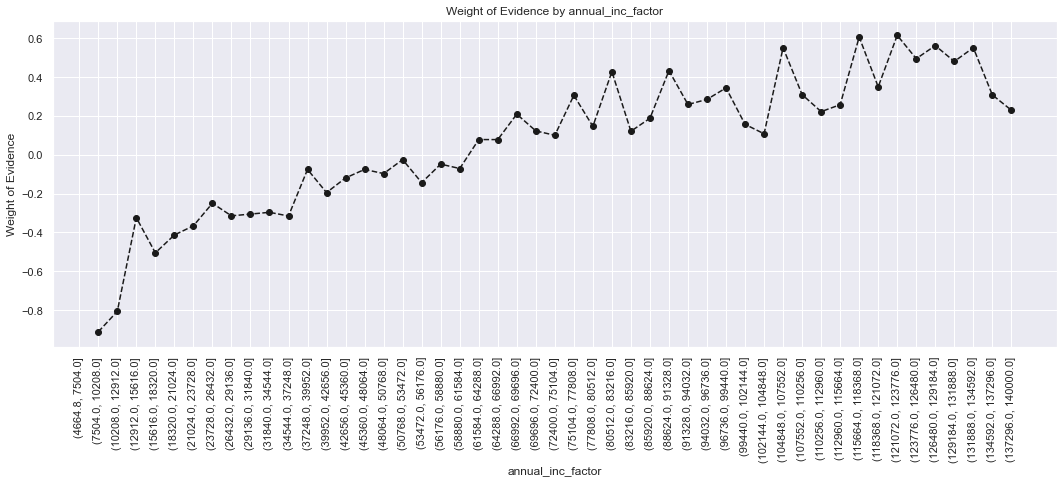

In [283]:
plot_by_woe(df_temp, 90)

In [284]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

#### 15. mths since last delinq

In [285]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\sathi\AppData\Local\Temp/ipykernel_15736/3988296756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                   (-0.17, 3.4]   1348       0.87        0.03 1171.00 177.00   
1                     (3.4, 6.8]   1890       0.88        0.04 1664.00 226.00   
2                    (6.8, 10.2]   3373       0.89        0.08 2992.00 381.00   
3                   (10.2, 13.6]   2496       0.90        0.06 2236.00 260.00   
4                   (13.6, 17.0]   3165       0.88        0.07 2798.00 367.00   
5                   (17.0, 20.4]   2282       0.89        0.05 2038.00 244.00   
6                   (20.4, 23.8]   2115       0.90        0.05 1900.00 215.00   
7                   (23.8, 27.2]   2755       0.90        0.06 2467.00 288.00   
8                   (27.2, 30.6]   1929       0.90        0.04 1729.00 200.00   
9                   (30.6, 34.0]   2453       0.89        0.06 2188.00 265.00   
10                  (34.0, 37.4]   1786       0.90        0.04 1615.00 171.00   
11                  (37.4, 40.8]   1765       0.89        0.04 1567.00 198.00   
12                  (40.8, 44.2]   2270       0.88        0.05 1989.00 281.00   
13                  (44.2, 47.6]   1664       0.90        0.04 1496.00 168.00   
14                  (47.6, 51.0]   1739       0.89        0.04 1545.00 194.00   
15                  (51.0, 54.4]   1158       0.89        0.03 1028.00 130.00   
16                  (54.4, 57.8]   1130       0.91        0.03 1030.00 100.00   
17                  (57.8, 61.2]   1423       0.90        0.03 1275.00 148.00   
18                  (61.2, 64.6]   1015       0.89        0.02  901.00 114.00   
19                  (64.6, 68.0]   1342       0.89        0.03 1197.00 145.00   
20                  (68.0, 71.4]    930       0.88        0.02  823.00 107.00   
21                  (71.4, 74.8]    928       0.89        0.02  825.00 103.00   
22                  (74.8, 78.2]   1195       0.91        0.03 1085.00 110.00   
23                  (78.2, 81.6]    768       0.88        0.02  676.00  92.00   
24                  (81.6, 85.0]    136       0.90        0.00  122.00  14.00   
25                  (85.0, 88.4]     10       1.00        0.00   10.00   0.00   
26                  (88.4, 91.8]      1       1.00        0.00    1.00   0.00   
27                  (91.8, 95.2]      2       1.00        0.00    2.00   0.00   
28                  (95.2, 98.6]      3       0.67        0.00    2.00   1.00   
29                 (98.6, 102.0]      4       1.00        0.00    4.00   0.00   
30                (102.0, 105.4]      2       1.00        0.00    2.00   0.00   
31                (105.4, 108.8]      3       1.00        0.00    3.00   0.00   
32                (108.8, 112.2]      1       1.00        0.00    1.00   0.00   
33                (112.2, 115.6]      1       1.00        0.00    1.00   0.00   
34                (115.6, 119.0]      2       1.00        0.00    2.00   0.00   
35                (119.0, 122.4]      2       1.00        0.00    2.00   0.00   
36                (122.4, 125.8]      1       1.00        0.00    1.00   0.00   
37                (125.8, 129.2]      0        NaN        0.00     NaN    NaN   
38                (129.2, 132.6]      1       1.00        0.00    1.00   0.00   
39                (132.6, 136.0]      1       1.00        0.00    1.00   0.00   
40                (136.0, 139.4]      0        NaN        0.00     NaN    NaN   
41                (139.4, 142.8]      0        NaN        0.00     NaN    NaN   
42                (142.8, 146.2]      1       1.00        0.00    1.00   0.00   
43                (146.2, 149.6]      0        NaN        0.00     NaN    NaN   
44                (149.6, 153.0]      0        NaN        0.00     NaN    NaN   
45                (153.0, 156.4]      0        NaN        0.00     NaN    NaN   
46                (156.4, 159.8]      0        NaN        0.00     NaN    NaN   
47                (159.8, 163.2]      0        NaN        0.00     NaN    NaN   
48                (163.2, 166.6]  

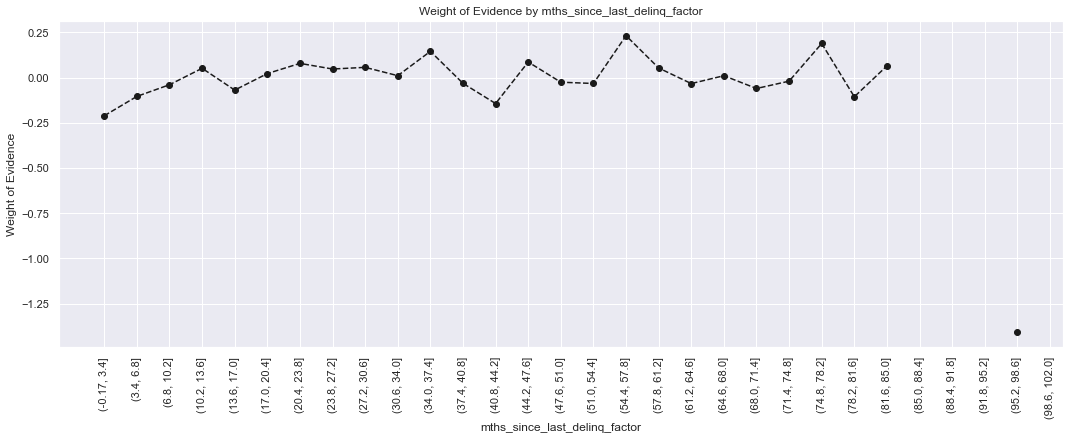

In [286]:
plot_by_woe(df_temp,90)

In [287]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

#### 16. dti factor

In [288]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.8]    371       0.89        0.00  329.00  42.00   
1         (0.8, 1.6]    478       0.90        0.01  430.00  48.00   
2       (1.6, 2.399]    639       0.90        0.01  577.00  62.00   
3     (2.399, 3.199]    808       0.91        0.01  737.00  71.00   
4     (3.199, 3.999]   1047       0.92        0.01  960.00  87.00   
5     (3.999, 4.799]   1260       0.91        0.01 1150.00 110.00   
6     (4.799, 5.599]   1527       0.91        0.02 1394.00 133.00   
7     (5.599, 6.398]   1730       0.91        0.02 1566.00 164.00   
8     (6.398, 7.198]   1999       0.92        0.02 1839.00 160.00   
9     (7.198, 7.998]   2227       0.91        0.02 2024.00 203.00   
10    (7.998, 8.798]   2299       0.91        0.02 2091.00 208.00   
11    (8.798, 9.598]   2590       0.91        0.03 2350.00 240.00   
12   (9.598, 10.397]   2800       0.91        0.03 2554.00 246.00   
13  (10.397, 11.197]   3076       0.91        0.03 2792.00 284.00   
14  (11.197, 11.997]   3151       0.90        0.03 2846.00 305.00   
15  (11.997, 12.797]   3326       0.90        0.04 2998.00 328.00   
16  (12.797, 13.597]   3331       0.91        0.04 3031.00 300.00   
17  (13.597, 14.396]   3431       0.90        0.04 3078.00 353.00   
18  (14.396, 15.196]   3528       0.90        0.04 3162.00 366.00   
19  (15.196, 15.996]   3447       0.90        0.04 3100.00 347.00   
20  (15.996, 16.796]   3342       0.90        0.04 2999.00 343.00   
21  (16.796, 17.596]   3478       0.89        0.04 3097.00 381.00   
22  (17.596, 18.395]   3351       0.90        0.04 3015.00 336.00   
23  (18.395, 19.195]   3266       0.89        0.04 2911.00 355.00   
24  (19.195, 19.995]   3209       0.89        0.03 2840.00 369.00   
25  (19.995, 20.795]   3168       0.88        0.03 2800.00 368.00   
26  (20.795, 21.595]   2960       0.88        0.03 2610.00 350.00   
27  (21.595, 22.394]   2846       0.88        0.03 2492.00 354.00   
28  (22.394, 23.194]   2637       0.87        0.03 2286.00 351.00   
29  (23.194, 23.994]   2565       0.87        0.03 2235.00 330.00   
30  (23.994, 24.794]   2329       0.87        0.02 2034.00 295.00   
31  (24.794, 25.594]   2106       0.87        0.02 1822.00 284.00   
32  (25.594, 26.393]   1957       0.86        0.02 1687.00 270.00   
33  (26.393, 27.193]   1785       0.87        0.02 1547.00 238.00   
34  (27.193, 27.993]   1753       0.87        0.02 1527.00 226.00   
35  (27.993, 28.793]   1575       0.86        0.02 1358.00 217.00   
36  (28.793, 29.593]   1492       0.87        0.02 1293.00 199.00   
37  (29.593, 30.392]   1203       0.86        0.01 1032.00 171.00   
38  (30.392, 31.192]    931       0.86        0.01  803.00 128.00   
39  (31.192, 31.992]    874       0.86        0.01  754.00 120.00   
40  (31.992, 32.792]    797       0.86        0.01  682.00 115.00   
41  (32.792, 33.592]    718       0.86        0.01  619.00  99.00   
42  (33.592, 34.391]    704       0.86        0.01  605.00  99.00   
43  (34.391, 35.191]    471       0.87        0.01  411.00  60.00   
44  (35.191, 35.991]    148       0.91        0.00  135.00  13.00   
45  (35.991, 36.791]    135       0.87        0.00  117.00  18.00   
46  (36.791, 37.591]    110       0.94        0.00  103.00   7.00   
47   (37.591, 38.39]     99       0.87        0.00   86.00  13.00   
48    (38.39, 39.19]     82       0.84        0.00   69.00  13.00   
49    (39.19, 39.99]    101       0.89        0.00   90.00  11.00   

    prop_n_good  prop_n_bad   WoE  diff_prop_good  diff_WoE   IV  
0          0.00        0.00 -0.04             NaN       NaN 0.03  
1          0.01        0.00  0.09            0.01      0.13 0.03  
2          0.01        0.01  0.13            0.00      0.04 0.03  
3          0.01        0.01  0.24            0.01      0.11 0.03  
4          0.01        0.01  0.30            0.00      0.06 0.03  
5          0.01        0.01  0.25            0.00      0.05 0.03  
6          0.02      

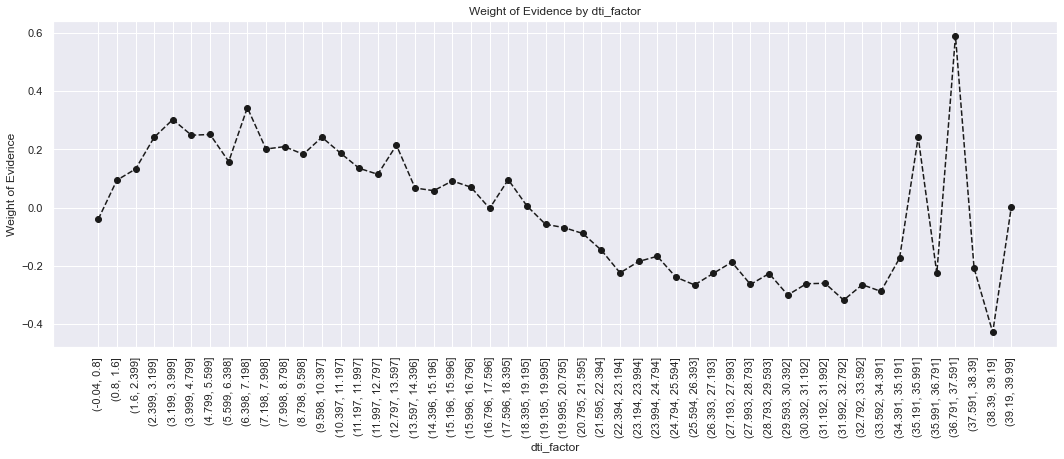

In [289]:
plot_by_woe(df_temp,90)

Most of the values are below 35. So we will have single category for above 35

In [290]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [291]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp["dti"],50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\sathi\AppData\Local\Temp/ipykernel_15736/1742180776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp["dti"],50)


dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0   (-0.035, 0.7]    328       0.88        0.00  290.00  38.00         0.00   
1      (0.7, 1.4]    393       0.90        0.00  355.00  38.00         0.00   
2      (1.4, 2.1]    536       0.90        0.01  480.00  56.00         0.01   
3      (2.1, 2.8]    607       0.92        0.01  556.00  51.00         0.01   
4      (2.8, 3.5]    811       0.92        0.01  750.00  61.00         0.01   
5      (3.5, 4.2]    970       0.90        0.01  876.00  94.00         0.01   
6      (4.2, 4.9]   1140       0.91        0.01 1041.00  99.00         0.01   
7      (4.9, 5.6]   1370       0.91        0.01 1249.00 121.00         0.02   
8      (5.6, 6.3]   1491       0.90        0.02 1349.00 142.00         0.02   
9      (6.3, 7.0]   1722       0.93        0.02 1596.00 126.00         0.02   
10     (7.0, 7.7]   1846       0.90        0.02 1669.00 177.00         0.02   
11     (7.7, 8.4]   2044       0.91        0.02 1859.00 185.00         0.02   
12     (8.4, 9.1]   2097       0.91        0.02 1909.00 188.00         0.02   
13     (9.1, 9.8]   2319       0.91        0.03 2106.00 213.00         0.03   
14    (9.8, 10.5]   2519       0.91        0.03 2292.00 227.00         0.03   
15   (10.5, 11.2]   2694       0.91        0.03 2447.00 247.00         0.03   
16   (11.2, 11.9]   2748       0.90        0.03 2478.00 270.00         0.03   
17   (11.9, 12.6]   2844       0.90        0.03 2570.00 274.00         0.03   
18   (12.6, 13.3]   2886       0.91        0.03 2623.00 263.00         0.03   
19   (13.3, 14.0]   3056       0.90        0.03 2745.00 311.00         0.03   
20   (14.0, 14.7]   3068       0.90        0.03 2756.00 312.00         0.03   
21   (14.7, 15.4]   2954       0.90        0.03 2653.00 301.00         0.03   
22   (15.4, 16.1]   3050       0.90        0.03 2747.00 303.00         0.03   
23   (16.1, 16.8]   2914       0.90        0.03 2611.00 303.00         0.03   
24   (16.8, 17.5]   3078       0.89        0.03 2730.00 348.00         0.03   
25   (17.5, 18.2]   2964       0.90        0.03 2677.00 287.00         0.03   
26   (18.2, 18.9]   2863       0.89        0.03 2560.00 303.00         0.03   
27   (18.9, 19.6]   2796       0.89        0.03 2481.00 315.00         0.03   
28   (19.6, 20.3]   2772       0.89        0.03 2461.00 311.00         0.03   
29   (20.3, 21.0]   2830       0.88        0.03 2489.00 341.00         0.03   
30   (21.0, 21.7]   2517       0.88        0.03 2225.00 292.00         0.03   
31   (21.7, 22.4]   2495       0.87        0.03 2172.00 323.00         0.03   
32   (22.4, 23.1]   2261       0.87        0.02 1958.00 303.00         0.02   
33   (23.1, 23.8]   2327       0.88        0.03 2039.00 288.00         0.02   
34   (23.8, 24.5]   2127       0.87        0.02 1852.00 275.00         0.02   
35   (24.5, 25.2]   1929       0.87        0.02 1674.00 255.00         0.02   
36   (25.2, 25.9]   1707       0.87        0.02 1478.00 229.00         0.02   
37   (25.9, 26.6]   1657       0.86        0.02 1422.00 235.00         0.02   
38   (26.6, 27.3]   1553       0.87        0.02 1347.00 206.00         0.02   
39   (27.3, 28.0]   1559       0.87        0.02 1362.00 197.00         0.02   
40   (28.0, 28.7]   1390       0.86        0.02 1198.00 192.00         0.01   
41   (28.7, 29.4]   1341       0.87        0.01 1166.00 175.00         0.01   
42   (29.4, 30.1]   1147       0.85        0.01  977.00 170.00         0.01   
43   (30.1, 30.8]    838       0.86        0.01  723.00 115.00         0.01   
44   (30.8, 31.5]    798       0.86        0.01  686.00 112.00         0.01   
45   (31.5, 32.2]    734       0.88        0.01  644.00  90.00         0.01   
46   (32.2, 32.9]    696       0.85        0.01  591.00 105.00         0.01   
47   (32.9, 33.6]    621       0.86        0.01  532.00  89.00         0.01   
48   (33.6, 34.3]    634       0.86        0.01  545.00  89.00         0.01   
49   (34.3, 35.0]    507       0.87        0.01  440.00  

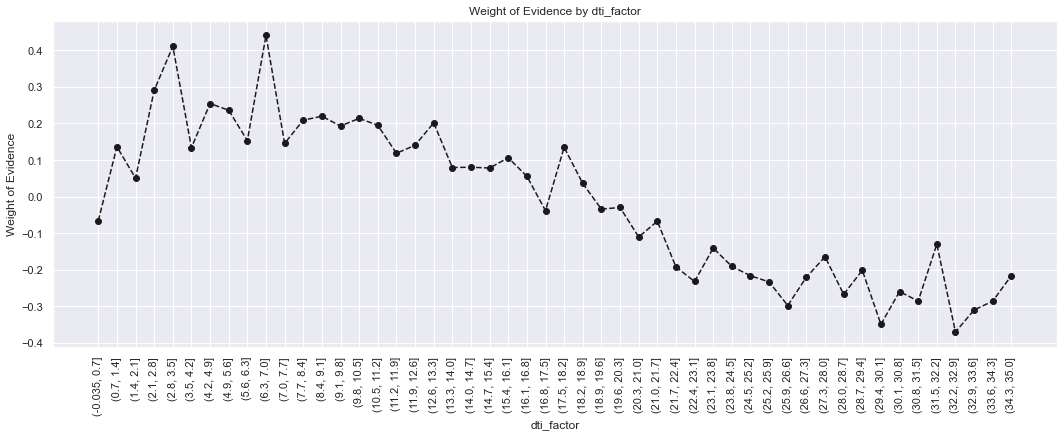

In [292]:
plot_by_woe(df_temp,90)

In [293]:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

#### 17. mths since last record

In [294]:
sum(df_inputs_prepr['mths_since_last_record'].isnull())

80686

We will create one category for missing values and do fine and coarse classing for the rest.

In [295]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\sathi\AppData\Local\Temp/ipykernel_15736/770603847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
C:\Users\sathi\anaconda3\envs\r4-anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.129, 2.58]    244       0.74        0.02  181.00  63.00   
1                   (2.58, 5.16]     36       0.89        0.00   32.00   4.00   
2                   (5.16, 7.74]     39       0.92        0.00   36.00   3.00   
3                  (7.74, 10.32]     66       0.94        0.01   62.00   4.00   
4                  (10.32, 12.9]     42       0.83        0.00   35.00   7.00   
5                  (12.9, 15.48]     69       0.87        0.01   60.00   9.00   
6                 (15.48, 18.06]     95       0.86        0.01   82.00  13.00   
7                 (18.06, 20.64]     58       0.97        0.00   56.00   2.00   
8                 (20.64, 23.22]    101       0.89        0.01   90.00  11.00   
9                  (23.22, 25.8]     94       0.95        0.01   89.00   5.00   
10                 (25.8, 28.38]    135       0.90        0.01  121.00  14.00   
11                (28.38, 30.96]    103       0.92        0.01   95.00   8.00   
12                (30.96, 33.54]    196       0.92        0.02  181.00  15.00   
13                (33.54, 36.12]    195       0.91        0.02  177.00  18.00   
14                 (36.12, 38.7]    166       0.91        0.01  151.00  15.00   
15                 (38.7, 41.28]    234       0.91        0.02  212.00  22.00   
16                (41.28, 43.86]    194       0.90        0.02  174.00  20.00   
17                (43.86, 46.44]    328       0.92        0.03  301.00  27.00   
18                (46.44, 49.02]    367       0.92        0.03  338.00  29.00   
19                 (49.02, 51.6]    231       0.94        0.02  218.00  13.00   
20                 (51.6, 54.18]    447       0.93        0.04  414.00  33.00   
21                (54.18, 56.76]    264       0.90        0.02  237.00  27.00   
22                (56.76, 59.34]    393       0.93        0.03  365.00  28.00   
23                (59.34, 61.92]    287       0.91        0.02  261.00  26.00   
24                 (61.92, 64.5]    405       0.92        0.03  373.00  32.00   
25                 (64.5, 67.08]    394       0.96        0.03  379.00  15.00   
26                (67.08, 69.66]    272       0.89        0.02  243.00  29.00   
27                (69.66, 72.24]    366       0.91        0.03  334.00  32.00   
28                (72.24, 74.82]    231       0.92        0.02  213.00  18.00   
29                 (74.82, 77.4]    350       0.92        0.03  322.00  28.00   
30                 (77.4, 79.98]    228       0.90        0.02  206.00  22.00   
31                (79.98, 82.56]    355       0.90        0.03  318.00  37.00   
32                (82.56, 85.14]    288       0.92        0.02  264.00  24.00   
33                (85.14, 87.72]    251       0.82        0.02  205.00  46.00   
34                 (87.72, 90.3]    345       0.89        0.03  307.00  38.00   
35                 (90.3, 92.88]    249       0.84        0.02  210.00  39.00   
36                (92.88, 95.46]    385       0.86        0.03  332.00  53.00   
37                (95.46, 98.04]    401       0.88        0.03  352.00  49.00   
38               (98.04, 100.62]    327       0.87        0.03  285.00  42.00   
39               (100.62, 103.2]    526       0.88        0.04  465.00  61.00   
40               (103.2, 105.78]    396       0.89        0.03  353.00  43.00   
41              (105.78, 108.36]    565       0.89        0.04  501.00  64.00   
42              (108.36, 110.94]    407       0.91        0.03  371.00  36.00   
43              (110.94, 113.52]    524       0.88        0.04  463.00  61.00   
44               (113.52, 116.1]    515       0.91        0.04  468.00  47.00   
45               (116.1, 118.68]    314       0.88        0.02  277.00  37.00   
46              (118.68, 121.26]     92       0.85        0.01   78.00  14.00   
47              (121.26, 123.84]      0        NaN        0.00     NaN    NaN   
48              (123.84, 126.42]  

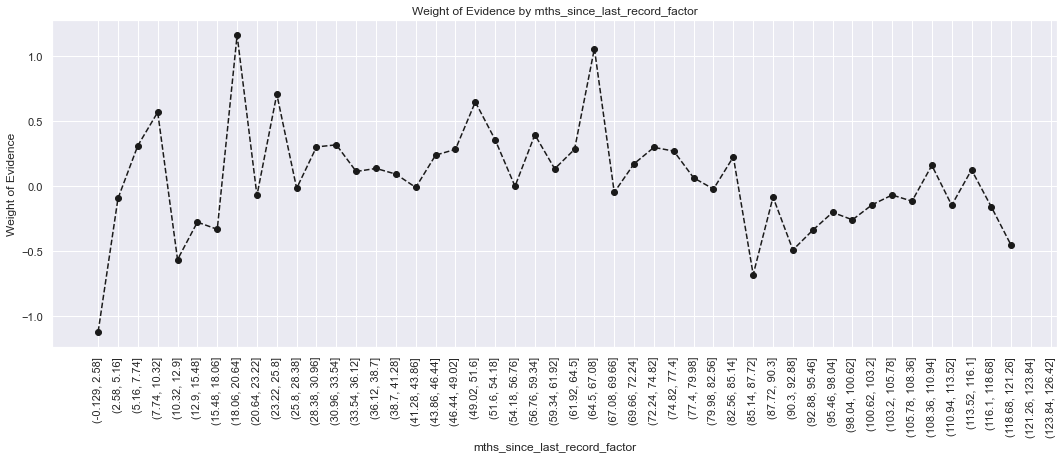

In [296]:
plot_by_woe(df_temp,90)

In [297]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

### Preprocessing the Test dataset

In order to the test the model in the test set, we must have the same dummy variables as the ones in the train set. The test dataframe is used only to test and assess a model, estimated on the training data. Therefore, we do not need to assess WoE or come up with categories

Saving it in new variable to avoid the change when we rerun the test data on the same variable

In [298]:
pd.options.display.max_rows = 8

In [299]:
#loan_data_inputs_train = df_inputs_prepr

Now we will replace the df_inputs_prepr where we defined that variable first for the train variables

In [300]:
loan_data_inputs_test = df_inputs_prepr

In [301]:
loan_data_inputs_test = loan_data_inputs_test.astype("object")
loan_data_inputs_train = loan_data_inputs_train.astype("object")


In [302]:
loan_data_inputs_train.to_csv('F:\\Codes\Dataset\\Credit analysis\\loan data\\loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('F:\\Codes\Dataset\\Credit analysis\\loan data\\loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('F:\\Codes\Dataset\\Credit analysis\\loan data\\loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('F:\\Codes\Dataset\\Credit analysis\\loan data\\loan_data_targets_test.csv')